In [41]:
# Bruce
import datetime
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
client = Socrata("data.bts.gov", None)
results = client.get("w96p-f2qv", where="date >= '2020-01-01T12:00:00' AND date < '2020-08-01T12:00:00' AND level = 'State'", limit=100000)

In [42]:
# Convert to pandas DataFrame
import pandas as pd
results_df = pd.DataFrame.from_records(results)

#Convert date format 
results_df.date = pd.to_datetime(results_df.date)

#Specify numerical dtypes
dtype_dict = {'pop_stay_at_home':int,
              'pop_not_stay_at_home':int, 'trips':int, 'trips_1':int, 'trips_1_3':int, 
              'trips_3_5':int, 'trips_5_10':int, 'trips_10_25':int,'trips_25_50':int, 'trips_50_100':int, 
              'trips_100_250':int, 'trips_250_500':int, 'trips_500':int}
results_df = results_df.astype(dtype = dtype_dict)

results_df.sort_values(by='date', inplace=True)

#Create some feature columns for pop at home vs. not
results_df['Total_Population'] = results_df['pop_stay_at_home'] + results_df['pop_not_stay_at_home']
results_df['Percent_Travel'] = results_df['pop_not_stay_at_home']/results_df['Total_Population']
results_df['Trips_per_Person'] = results_df['trips']/results_df['Total_Population']

(10863, 17)


In [45]:
#Specify the Trump 2016 States
TRUMP_2016_STATES = ['AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'IA', 'ID', 'IN', 'KS', 'KY', 'LA', 'MI', 'MS', 'MO', 'MT', 'NE',
                     'NC', 'ND', 'OH', 'OK', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'WI', 'WV', 'WY']

#Subset key 2016 Trump States
TRUMP_2016_STATES_SUBSET = ['TX', 'FL', 'AZ', 'AL']


#Specify the Hillary 2016 States
HILLARY_2016_STATES = ['CA', 'CO', 'CT', 'DC', 'DE', 'HI', 'IL', 'ME', 'MD', 'MA', 'MN', 'NV', 'NH', 'NJ', 'NM', 'NY',
                       'OR', 'RI', 'VA', 'VT', 'WA']

#Subset some key 2016 states
HILLARY_2016_STATES_SUBSET = ['MA', 'NY', 'NJ', 'CA']

# Get the Population and Land Area to Cluster States
- Data from US Census

In [46]:
US_STATE_POPULATION_DICT = {'Alabama':4903185, 'Alaska':731545,'Arizona':7278717,'Arkansas':3017804,'California':39512223,
                            'Colorado':5758736,'Connecticut':3565287,'Delaware':973764,'District of Columbia':705749,
                            'Florida':21477737,'Georgia':10617423,'Hawaii':1415872,'Idaho':1787065,'Illinois':12671821,
                            'Indiana':6732219,'Iowa':3155070,'Kansas':2913314,'Kentucky':4467673,'Louisiana':4648794,
                            'Maine':1344212,'Maryland':6045680,'Massachusetts':6892503,'Michigan':9986857,
                            'Minnesota':5639632,'Mississippi':2976149,'Missouri':6137428,'Montana':1068778,
                            'Nebraska':1934408,'Nevada':3080156,'New Hampshire':1359711,'New Jersey':8882190,
                            'New Mexico':2096829,'New York':19453561,'North Carolina':10488084,'North Dakota':762062,
                            'Ohio':11689100,'Oklahoma':3956971,'Oregon':4217737,'Pennsylvania':12801989,
                            'Rhode Island':1059361,'South Carolina':5148714,'South Dakota':884659,'Tennessee':6829174,
                            'Texas':28995881,'Utah':3205958,'Vermont':623989,'Virginia':8535519,'Washington':7614893, 
                            'West Virginia':1792147,'Wisconsin':5822434,'Wyoming':578759}

land_area_str = '''State	Value
Alabama	50,645.33
Alaska	570,640.95
Arizona	113,594.08
Arkansas	52,035.48
California	155,779.22
Colorado	103,641.89
Connecticut	4,842.36
Delaware	1,948.54
District of Columbia	61.05
Florida	53,624.76
Georgia	57,513.49
Hawaii	6,422.63
Idaho	82,643.12
Illinois	55,518.93
Indiana	35,826.11
Iowa	55,857.13
Kansas	81,758.72
Kentucky	39,486.34
Louisiana	43,203.90
Maine	30,842.92
Maryland	9,707.24
Massachusetts	7,800.06
Michigan	56,538.90
Minnesota	79,626.74
Mississippi	46,923.27
Missouri	68,741.52
Montana	145,545.80
Nebraska	76,824.17
Nevada	109,781.18
New Hampshire	8,952.65
New Jersey	7,354.22
New Mexico	121,298.15
New York	47,126.40
North Carolina	48,617.91
North Dakota	69,000.80
Ohio	40,860.69
Oklahoma	68,594.92
Oregon	95,988.01
Pennsylvania	44,742.70
Rhode Island	1,033.81
South Carolina	30,060.70
South Dakota	75,811.00
Tennessee	41,234.90
Texas	261,231.71
Utah	82,169.62
Vermont	9,216.66
Virginia	39,490.09
Washington	66,455.52
West Virginia	24,038.21
Wisconsin	54,157.80
Wyoming	97,093.14'''

US_LAND_AREA_DICT = {}
for state_area_pair in land_area_str.split('\n')[1:]:
    state_name = state_area_pair.split("\t")[0]
    land_area = float(state_area_pair.split("\t")[1].replace(",", ""))
    US_LAND_AREA_DICT[state_name] = land_area

In [47]:
state_code_string = '''AK	Alaska
AL	Alabama
AR	Arkansas
AZ	Arizona
CA	California
CO	Colorado
CT	Connecticut
DC	District of Columbia
DE	Delaware
FL	Florida
GA	Georgia
HI	Hawaii
IA	Iowa
ID	Idaho
IL	Illinois
IN	Indiana
KS	Kansas
KY	Kentucky
LA	Louisiana
MA	Massachusetts
MD	Maryland
ME	Maine
MI	Michigan
MN	Minnesota
MO	Missouri
MS	Mississippi
MT	Montana
NC	North Carolina
ND	North Dakota
NE	Nebraska
NH	New Hampshire
NJ	New Jersey
NM	New Mexico
NV	Nevada
NY	New York
OH	Ohio
OK	Oklahoma
OR	Oregon
PA	Pennsylvania
RI	Rhode Island
SC	South Carolina
SD	South Dakota
TN	Tennessee
TX	Texas
UT	Utah
VA	Virginia
VT	Vermont
WA	Washington
WI	Wisconsin
WV	West Virginia
WY	Wyoming'''

STATE_CODE_DICT = {}
for code_state_pair in state_code_string.split('\n'):
    state_name = code_state_pair.split("\t")[1]
    state_code = code_state_pair.split("\t")[0]
    STATE_CODE_DICT[state_name] = state_code

In [48]:
US_STATE_POPULATION_DICT

{'Alabama': 4903185,
 'Alaska': 731545,
 'Arizona': 7278717,
 'Arkansas': 3017804,
 'California': 39512223,
 'Colorado': 5758736,
 'Connecticut': 3565287,
 'Delaware': 973764,
 'District of Columbia': 705749,
 'Florida': 21477737,
 'Georgia': 10617423,
 'Hawaii': 1415872,
 'Idaho': 1787065,
 'Illinois': 12671821,
 'Indiana': 6732219,
 'Iowa': 3155070,
 'Kansas': 2913314,
 'Kentucky': 4467673,
 'Louisiana': 4648794,
 'Maine': 1344212,
 'Maryland': 6045680,
 'Massachusetts': 6892503,
 'Michigan': 9986857,
 'Minnesota': 5639632,
 'Mississippi': 2976149,
 'Missouri': 6137428,
 'Montana': 1068778,
 'Nebraska': 1934408,
 'Nevada': 3080156,
 'New Hampshire': 1359711,
 'New Jersey': 8882190,
 'New Mexico': 2096829,
 'New York': 19453561,
 'North Carolina': 10488084,
 'North Dakota': 762062,
 'Ohio': 11689100,
 'Oklahoma': 3956971,
 'Oregon': 4217737,
 'Pennsylvania': 12801989,
 'Rhode Island': 1059361,
 'South Carolina': 5148714,
 'South Dakota': 884659,
 'Tennessee': 6829174,
 'Texas': 289958

In [49]:
State_Population_df = pd.DataFrame.from_dict(US_STATE_POPULATION_DICT, orient='index', 
                       columns=['Population']).reset_index().rename(columns={'index':'State'})
State_Area_df = pd.DataFrame.from_dict(US_LAND_AREA_DICT, orient='index', 
                       columns=['Area']).reset_index().rename(columns={'index':'State'})
State_Cluster_df = pd.merge(State_Population_df, State_Area_df, on='State', how='inner')
State_Cluster_df.replace(STATE_CODE_DICT, inplace=True)
State_Cluster_df['Pop_per_sqMile'] = State_Cluster_df.Population/State_Cluster_df.Area
#State_Cluster_df[State_Cluster_df.columns[1:]] = (State_Cluster_df[State_Cluster_df.columns[1:]]-State_Cluster_df[State_Cluster_df.columns[1:]].min())/(State_Cluster_df[State_Cluster_df.columns[1:]].max()-State_Cluster_df[State_Cluster_df.columns[1:]].min())

In [51]:
State_Cluster_df = State_Cluster_df[(State_Cluster_df['State'] != 'AK') & (State_Cluster_df['State'] != 'DC')].reset_index(drop = True)

In [52]:
label = []
for i in range(len(State_Cluster_df)):
    if State_Cluster_df['State'][i] in TRUMP_2016_STATES:
        label.append(1)
    else:
        label.append(0)
State_Cluster_df['label'] = label
State_Cluster_df.head()

State  Population       Area  Pop_per_sqMile  label
0    AL     4903185   50645.33       96.814158      1
1    AZ     7278717  113594.08       64.076552      1
2    AR     3017804   52035.48       57.995122      1
3    CA    39512223  155779.22      253.642450      0
4    CO     5758736  103641.89       55.563788      0

# Find the best number of clusters

Here we can see that 3 is the best.

In [56]:
df_for_cluster = State_Cluster_df
X = df_for_cluster[list(df_for_cluster)[1:4]]
#X = pd.concat([df_for_cluster.loc[0:7], df_for_cluster.loc[9:]])[list(df_for_cluster)[1:4]]
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
#X = StandardScaler().fit_transform(X)
for i in range(2,10):
    db = AgglomerativeClustering(n_clusters = i).fit(X)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    print("Number of Clusters: %s, score of Agg: %s" %  (i, metrics.silhouette_score(X, db.labels_, metric='euclidean')))
    print("Number of Clusters: %s, score of KMeans: %s" %  (i, metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')))
    print("======")

Number of Clusters: 2, score of Agg: 0.7850613352209886
Number of Clusters: 2, score of KMeans: 0.7850613352209886
Number of Clusters: 3, score of Agg: 0.5724704799748469
Number of Clusters: 3, score of KMeans: 0.6274907182278939
Number of Clusters: 4, score of Agg: 0.5760119488659295
Number of Clusters: 4, score of KMeans: 0.5757186034443996
Number of Clusters: 5, score of Agg: 0.5271632657831407
Number of Clusters: 5, score of KMeans: 0.5867274177358724
Number of Clusters: 6, score of Agg: 0.5354939435238799
Number of Clusters: 6, score of KMeans: 0.5952054778543479
Number of Clusters: 7, score of Agg: 0.5841471273066746
Number of Clusters: 7, score of KMeans: 0.5896338550186044
Number of Clusters: 8, score of Agg: 0.5878271272225626
Number of Clusters: 8, score of KMeans: 0.5906079282319713
Number of Clusters: 9, score of Agg: 0.5683845804680301
Number of Clusters: 9, score of KMeans: 0.571469261170339


# Use 3-Means to cluster

In [68]:
db = KMeans(n_clusters=3, random_state=0).fit(X)
db.labels_
df_for_cluster['cluster'] = db.labels_

array([0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0])

In [72]:
df_for_cluster[['State', 'cluster']].to_csv('state_cluster_result.csv', index = False)

# Analysis Part

In [31]:
for i in range(4):
    print("Cluster {}".format(i))
    print("T:")
    print(df_result['State'][(df_result['cluster'] == i) & (df_result['label'] == 1)].to_list())
    print("C:")
    print(df_result['State'][(df_result['cluster'] == i) & (df_result['label'] == 0)].to_list())
    print("======")

Cluster 0
T:
['AL', 'AZ', 'AR', 'ID', 'IA', 'KS', 'KY', 'LA', 'MS', 'MO', 'MT', 'NE', 'ND', 'OK', 'SD', 'UT', 'WV', 'WI', 'WY']
C:
['CO', 'ME', 'MN', 'NV', 'NH', 'NM', 'OR', 'VT', 'WA']
Cluster 1
T:
['AK']
C:
[]
Cluster 2
T:
['FL', 'GA', 'IN', 'MI', 'NC', 'OH', 'PA', 'SC', 'TN']
C:
['CT', 'DE', 'DC', 'HI', 'IL', 'MD', 'MA', 'NJ', 'NY', 'RI', 'VA']
Cluster 3
T:
['TX']
C:
['CA']


In [68]:
# Assign the cluster number to the results_df
tem_l = []
tem_k = []
for i in range(len(results_df)):
    tem_l.append(df_result['cluster'][df_result['State'] == results_df['state_code'][i]].tolist()[0])
    tem_k.append(df_result['label'][df_result['State'] == results_df['state_code'][i]].tolist()[0])
results_df['cluster'] = tem_l
results_df['tc'] = tem_k

In [128]:
def retrieve_sum_of_data(date, column, cluster_num, tc, df):
    return np.sum(df[column][(results_df['date'] == date) & (df['cluster'] == cluster_num) & (df['tc'] == tc)])

period = (datetime.datetime(2020,8,1) - datetime.datetime(2020,1,2)).days

def get_timeline(start, period, column1, column2, cluster_num, tc, df, smooth):
    l = []
    for i in range(period+1):
        a = retrieve_sum_of_data(start + datetime.timedelta(i,0), column1, cluster_num, tc, df)
        b = retrieve_sum_of_data(start + datetime.timedelta(i,0), column2, cluster_num, tc, df)
        l.append(a / b)
    return smooth_timeline(l, smooth)

def smooth_timeline(l, smooth):
    l1 = []
    for i in range(len(l)-smooth + 1):
        s = 0
        for j in range(smooth):
            s += l[i+j]

        l1.append(s / smooth)
    return l1



def plot_line(start, period, column1, column2, cluster_num, df, smooth, title_name):
    plt.figure(figsize = (20,10))
    plt.plot(get_timeline(start, period, column1, column2, cluster_num, 1, df, smooth))
    plt.plot(get_timeline(start, period, column1, column2, cluster_num, 0, df, smooth))
    plt.legend(['Trump States', 'Clinton States'], fontsize = 25)
    timelabel = []
    for i in range(0, 250, 50):
        timelabel.append(str(start + datetime.timedelta(i, 0))[:10])
    plt.xticks(  range(0, 250, 50), timelabel,fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.ylabel(title_name, fontsize = 20)
    plt.title('{}: Trump States vs Clinton States ({}-day average), #Cluster {}'.format(title_name, smooth, cluster_num), fontsize = 20)
    plt.axvline(x=71, ls = '--', linewidth = 4, ymin = 0.25, ymax = 0.85, label = 'National Emergency')


# Trips per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


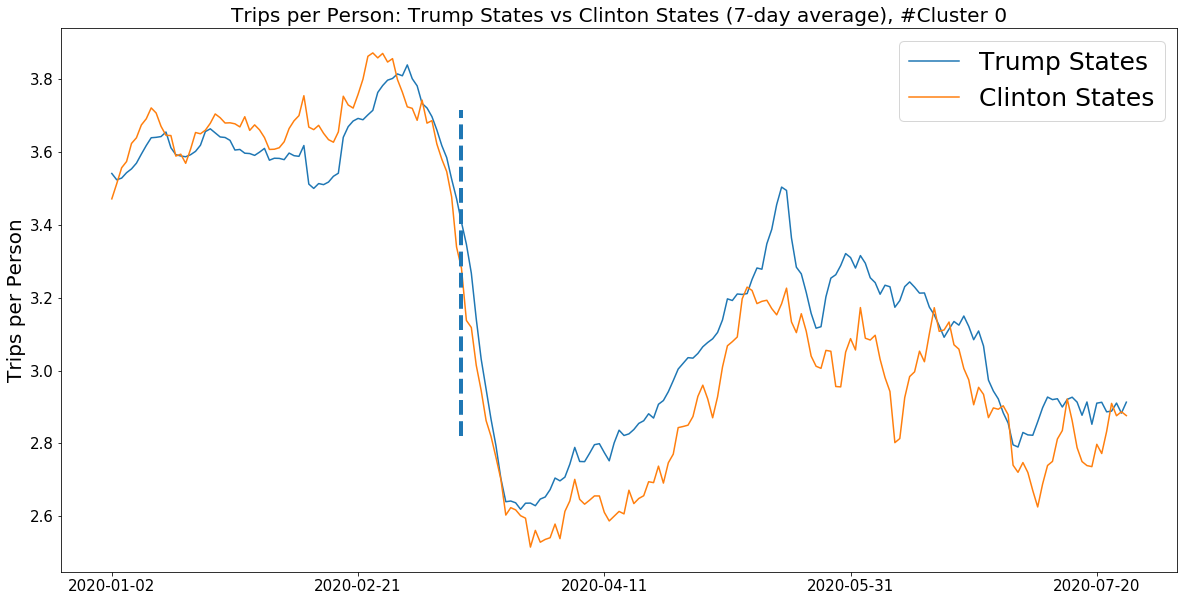

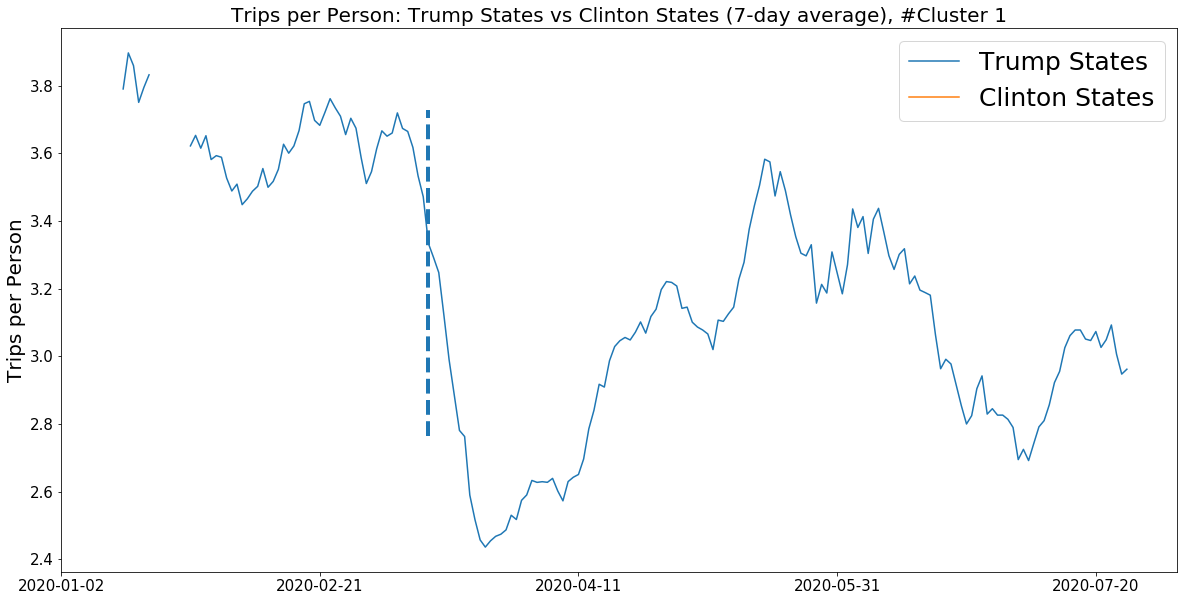

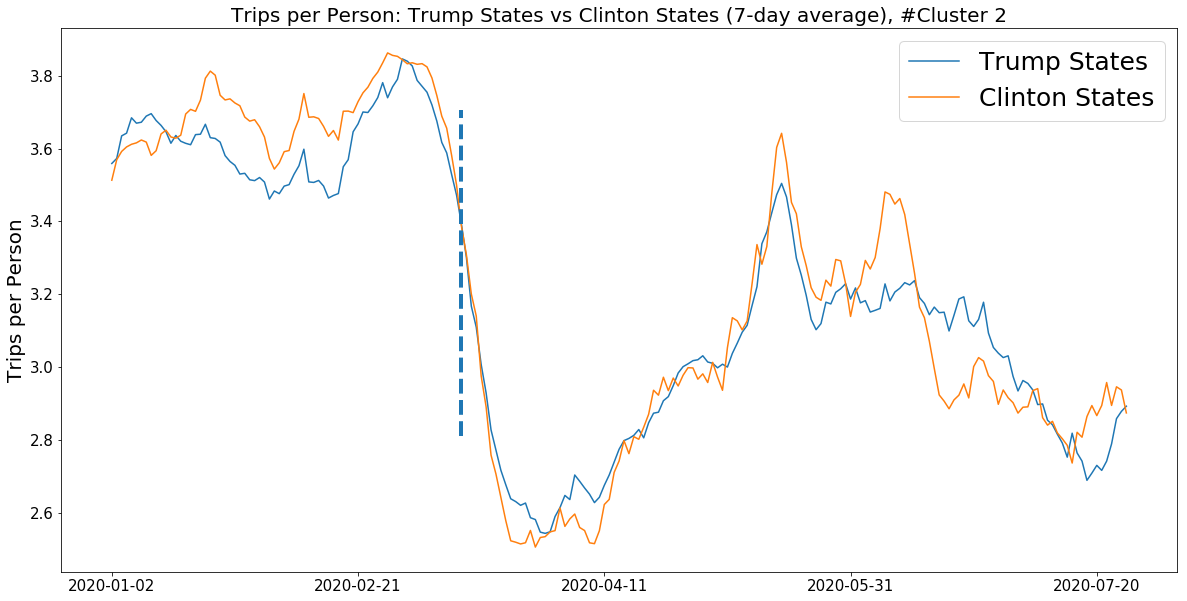

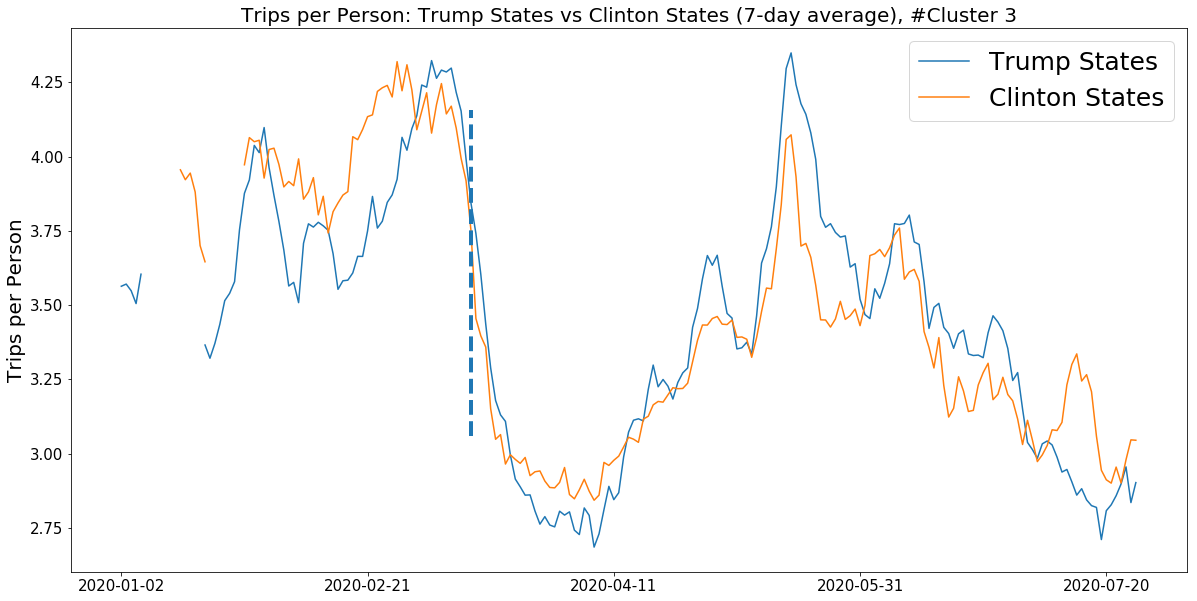

In [129]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips', 'Total_Population', i, results_df, 7, 'Trips per Person')

In [126]:
list(results_df)

['date',
 'level',
 'pop_not_stay_at_home',
 'pop_stay_at_home',
 'state_code',
 'state_fips',
 'trips',
 'trips_1',
 'trips_100_250',
 'trips_10_25',
 'trips_1_3',
 'trips_250_500',
 'trips_25_50',
 'trips_3_5',
 'trips_500',
 'trips_50_100',
 'trips_5_10',
 'Total_Population',
 'Percent_Travel',
 'Trips_per_Person',
 'cluster',
 'tc']

# Trips with in One Mile per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


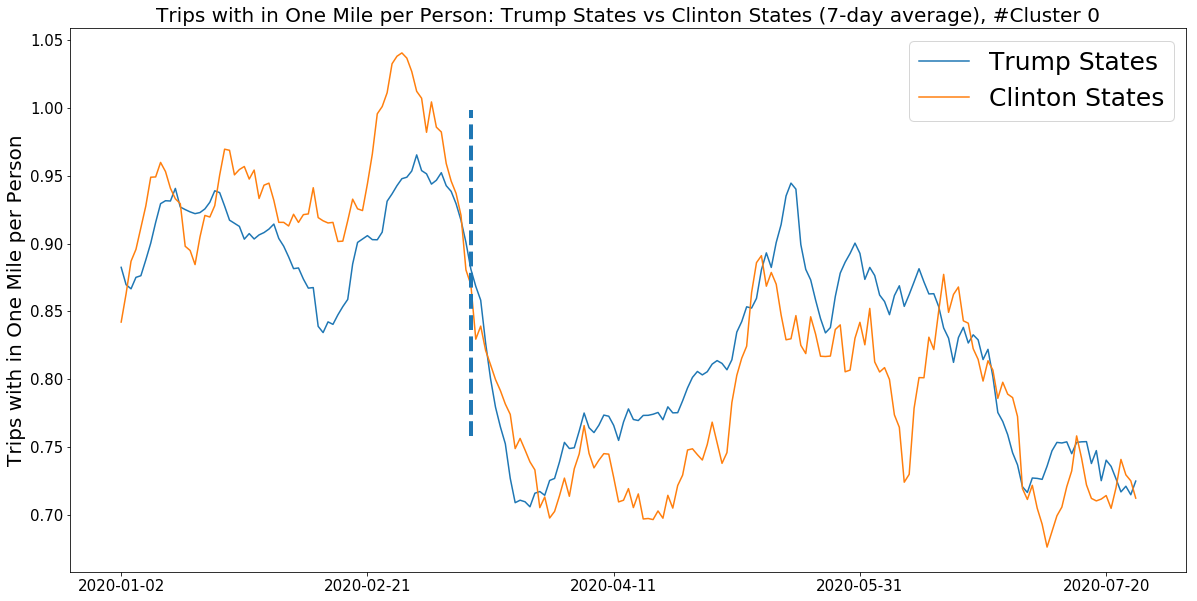

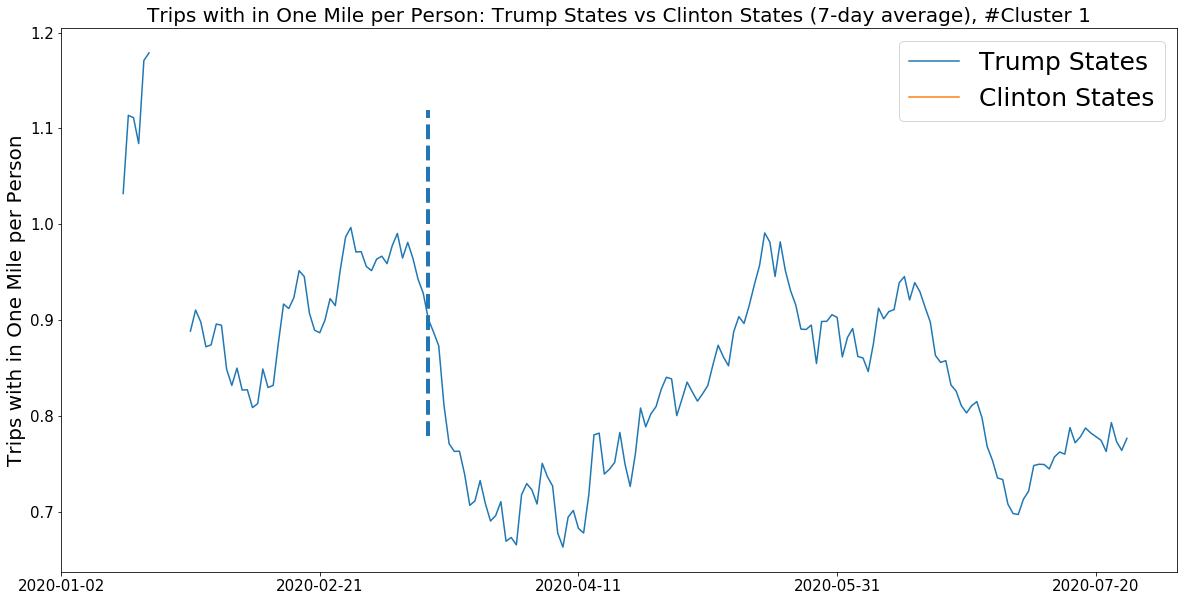

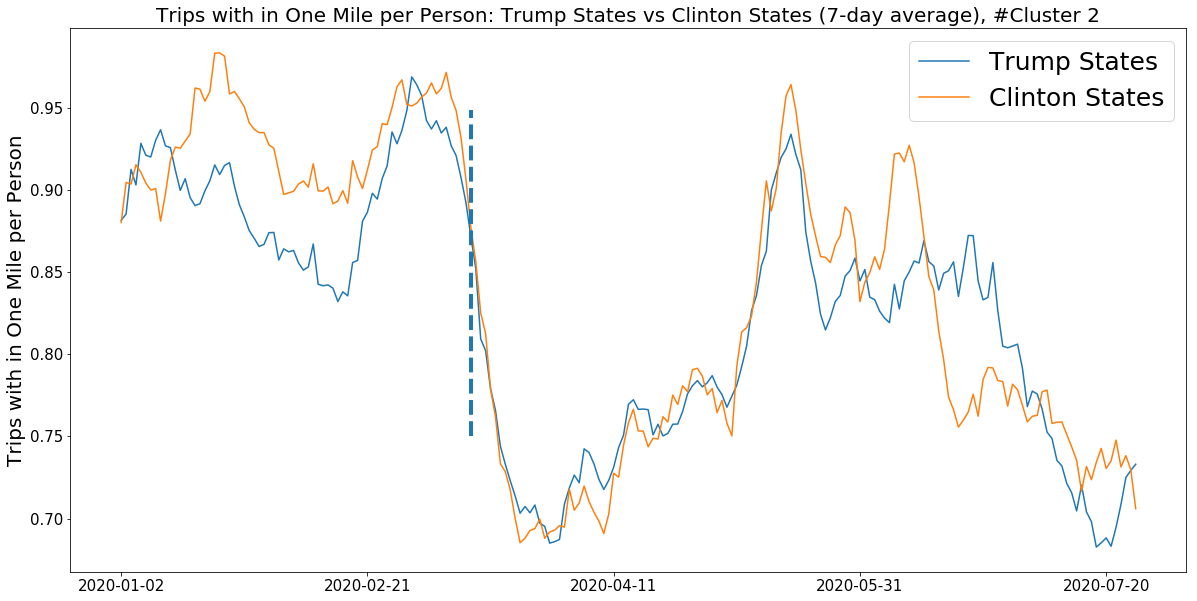

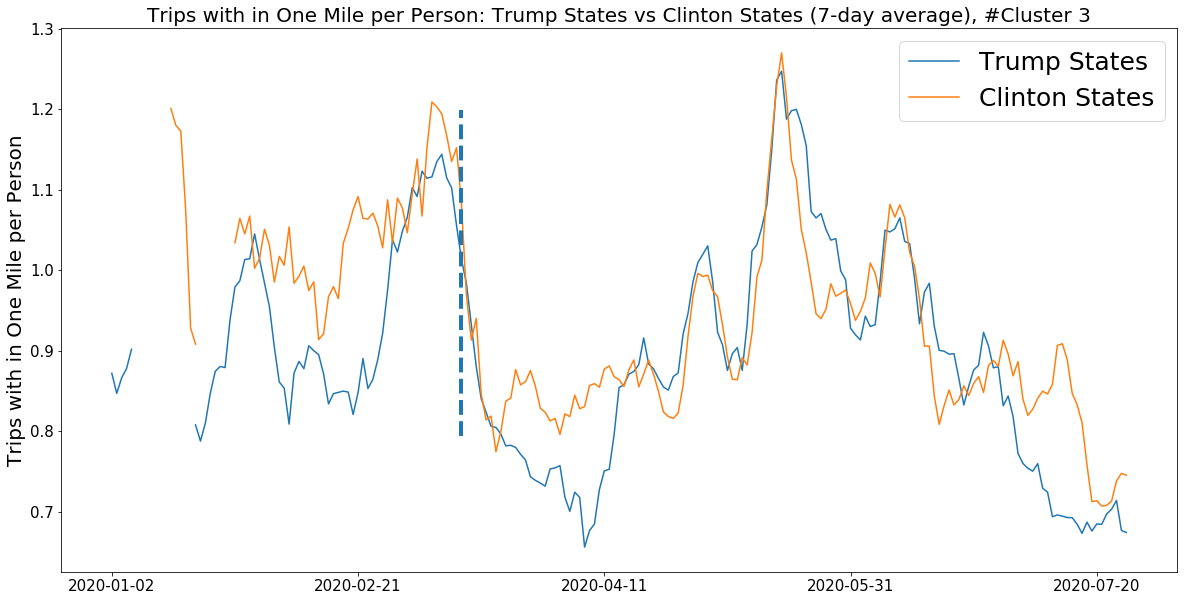

In [131]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_1', 'Total_Population', i, results_df, 7, 'Trips with in One Mile per Person')

# Trips 1 to 3 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


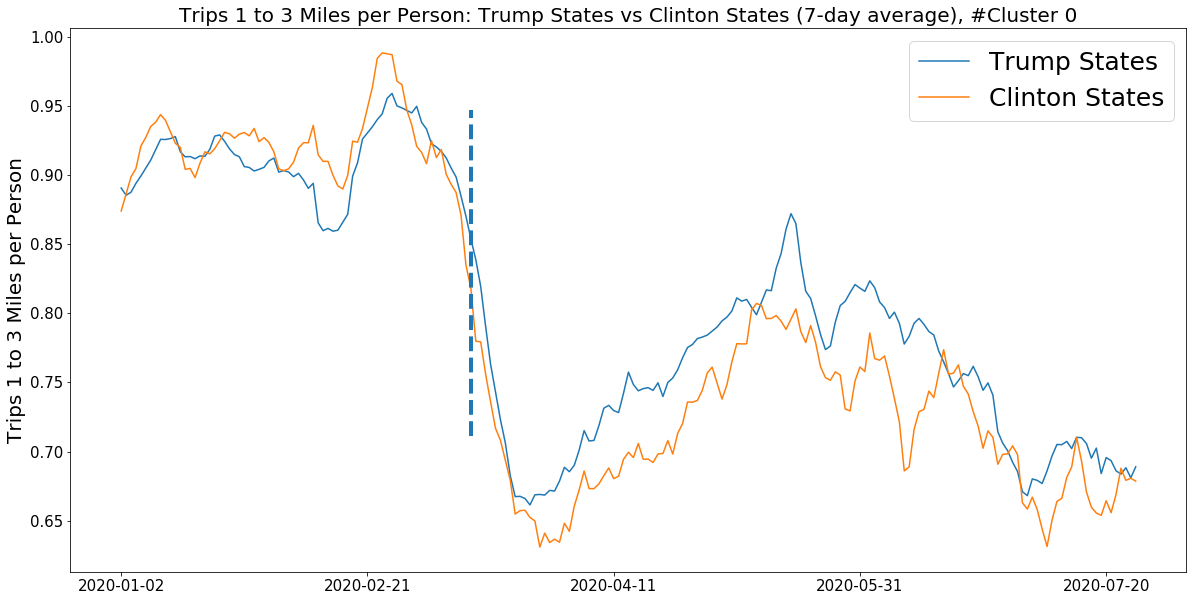

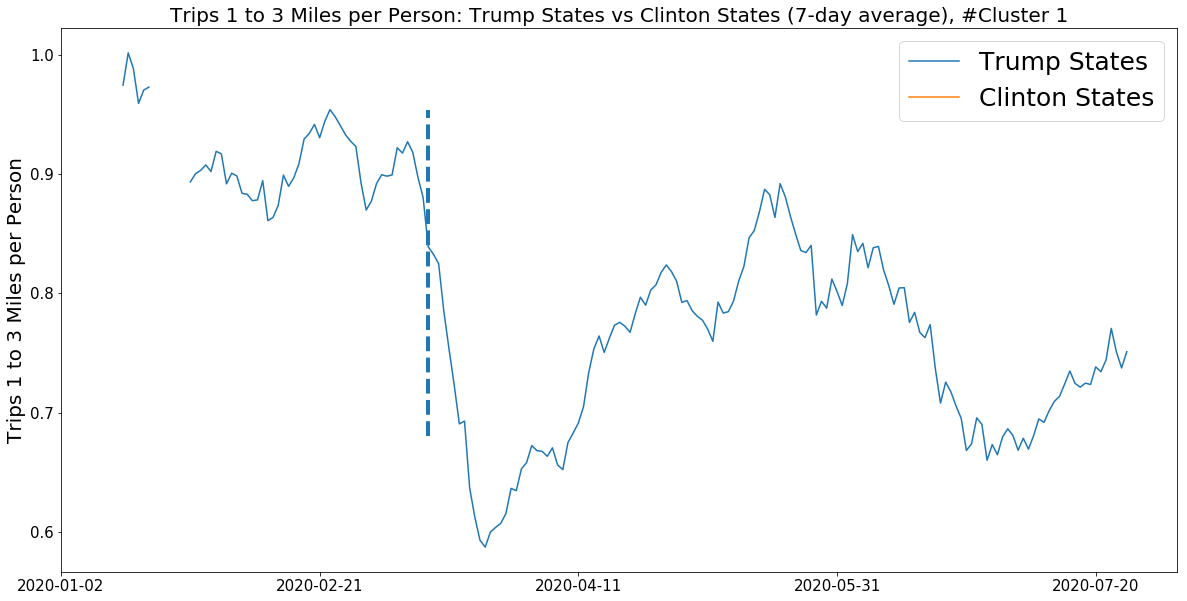

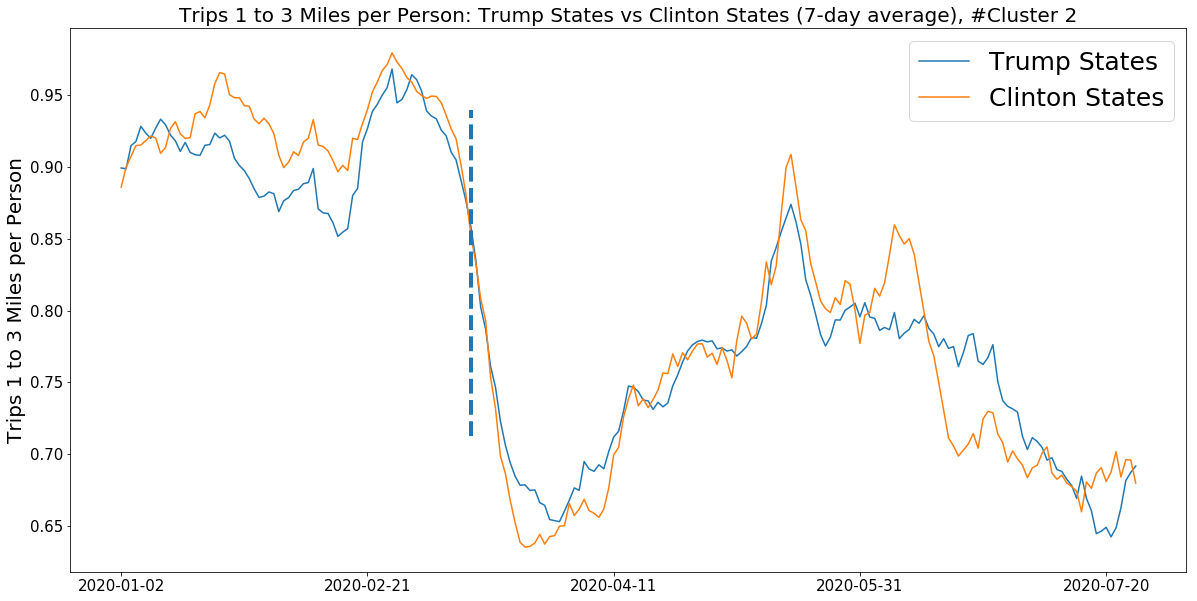

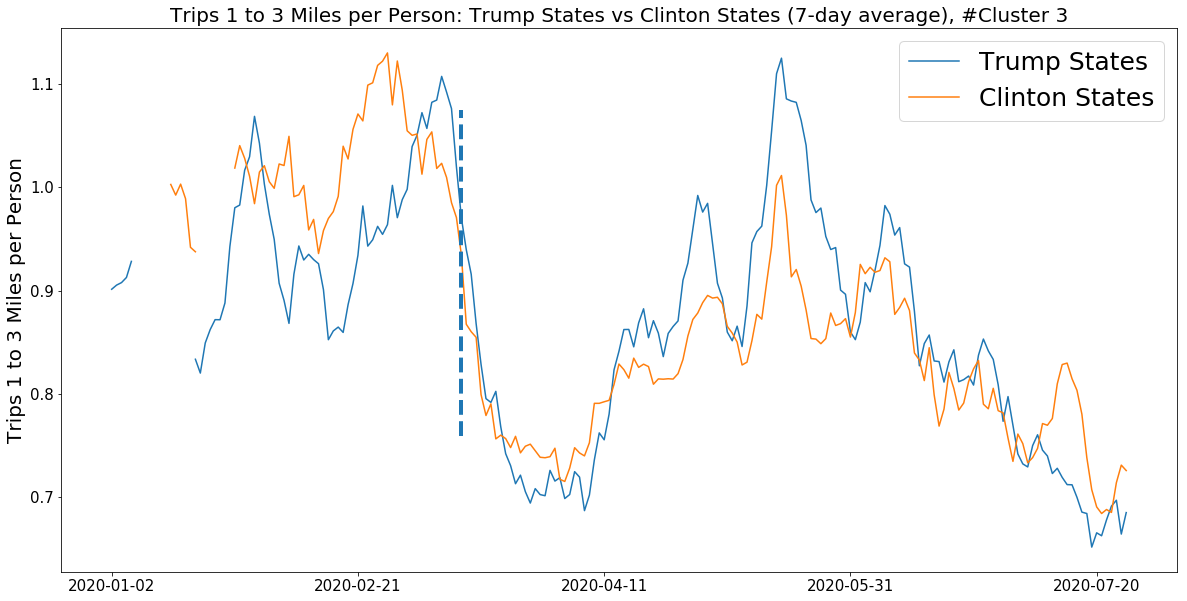

In [132]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_1_3', 'Total_Population', i, results_df, 7, 'Trips 1 to 3 Miles per Person')

# Trips 3 to 5 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


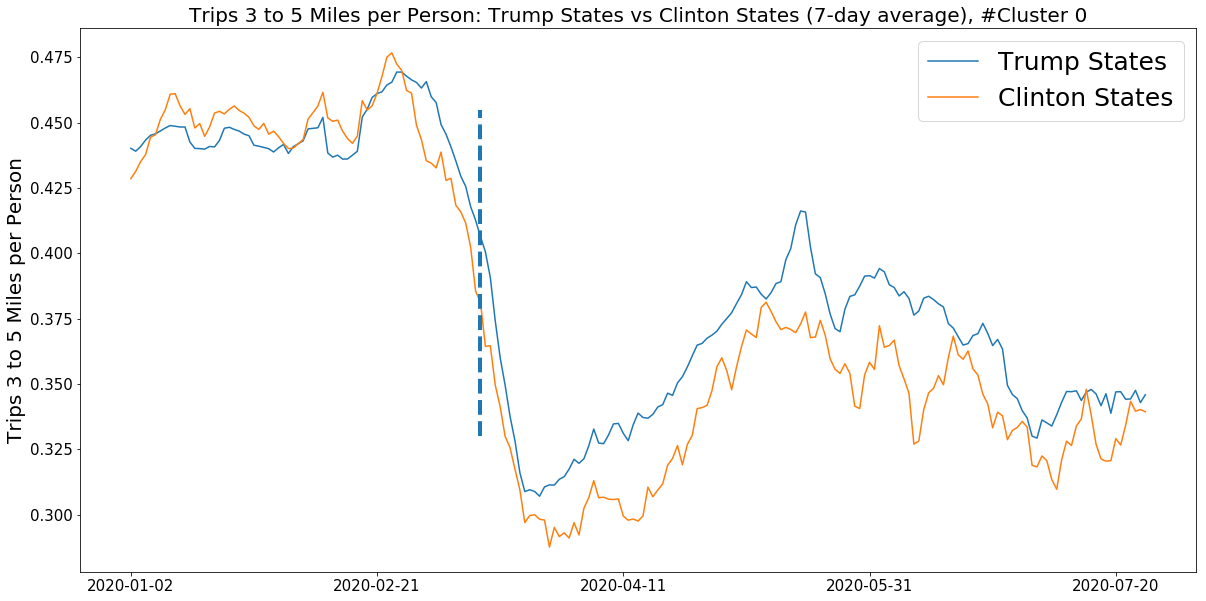

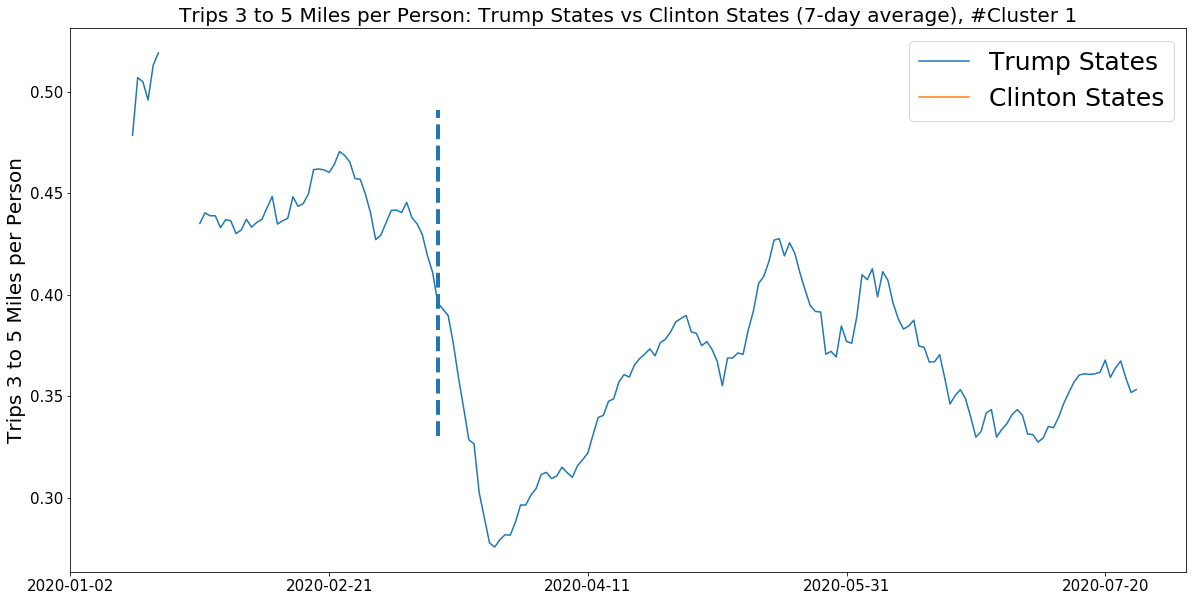

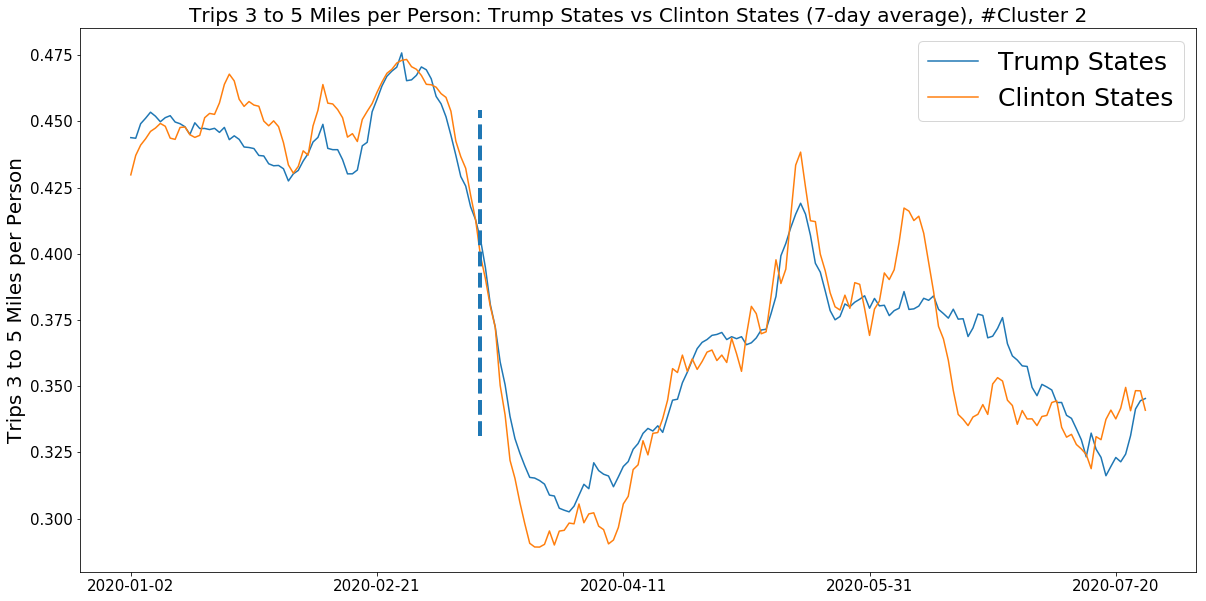

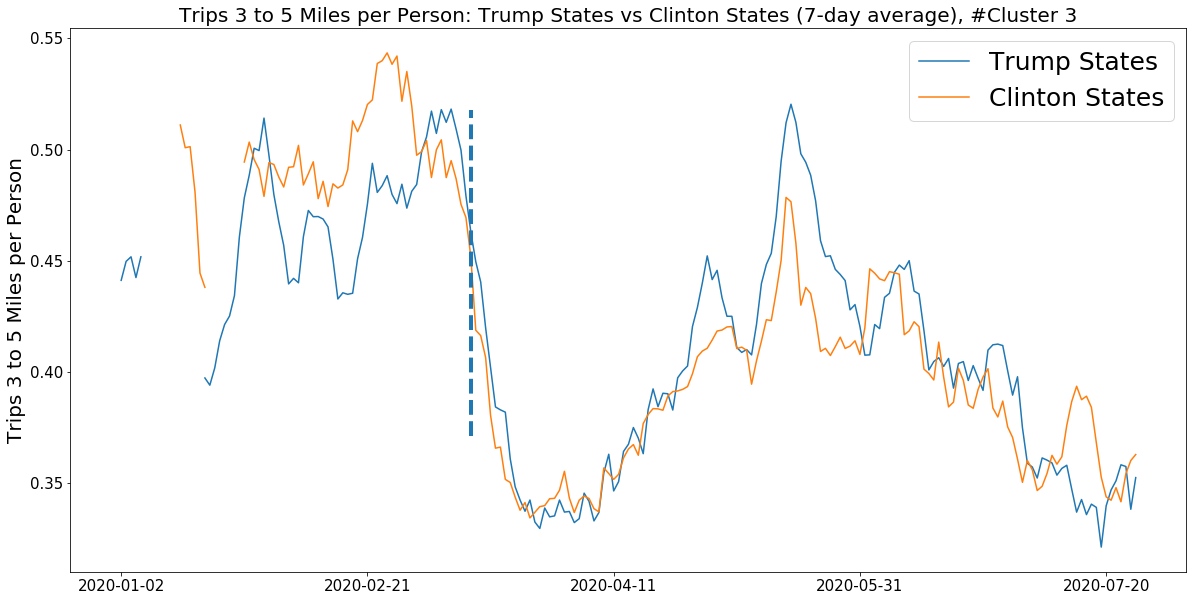

In [133]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_3_5', 'Total_Population', i, results_df, 7, 'Trips 3 to 5 Miles per Person')

# Trips 5 to 10 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


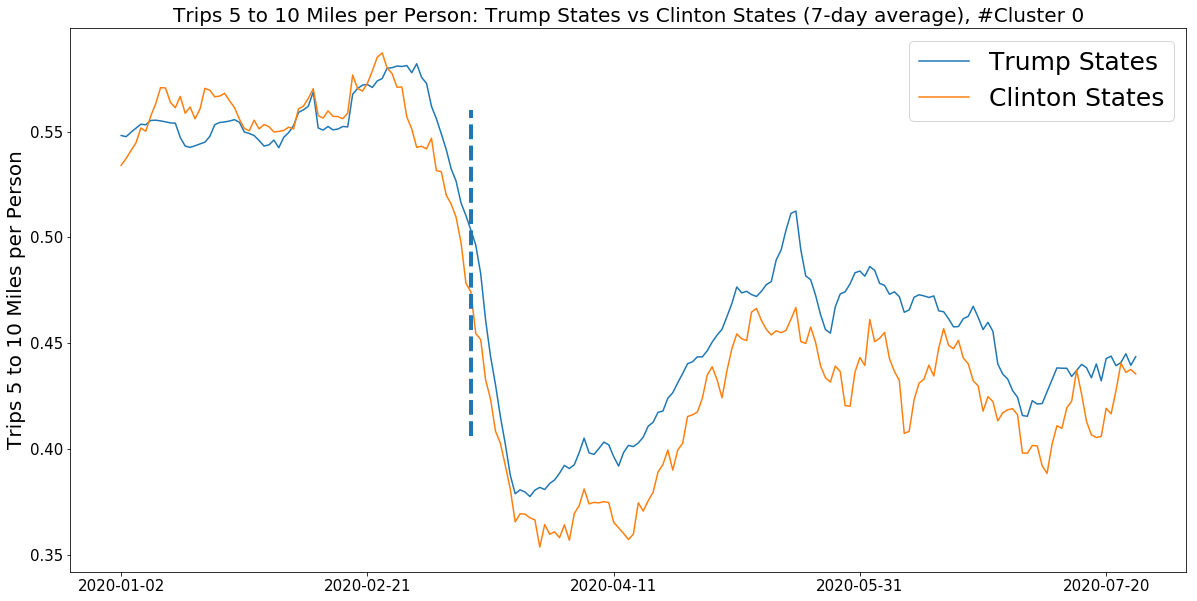

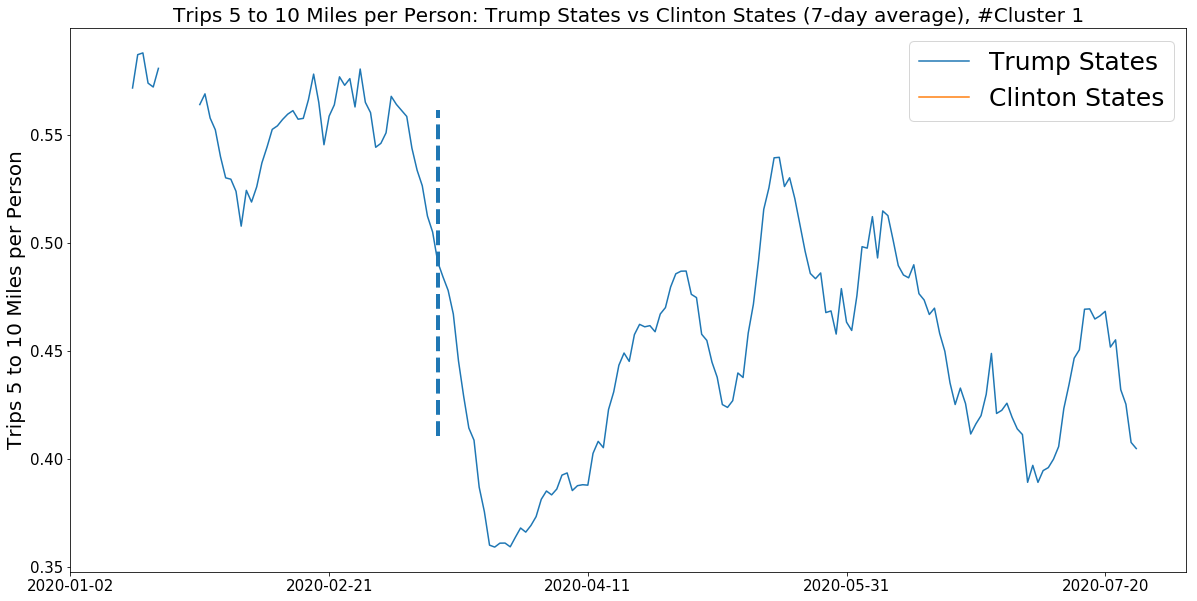

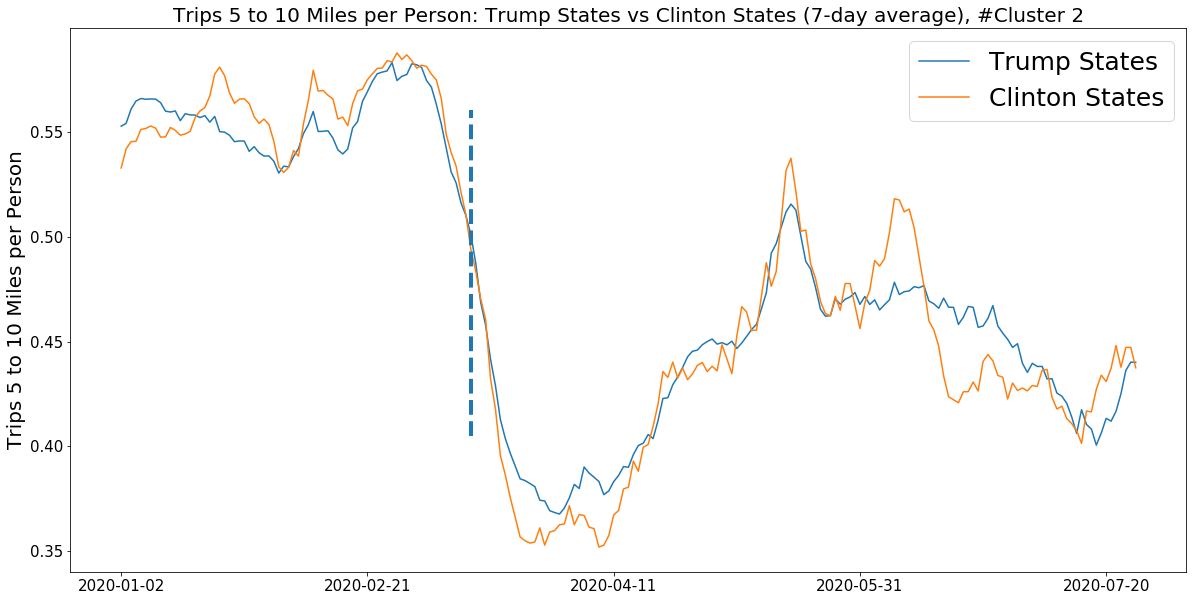

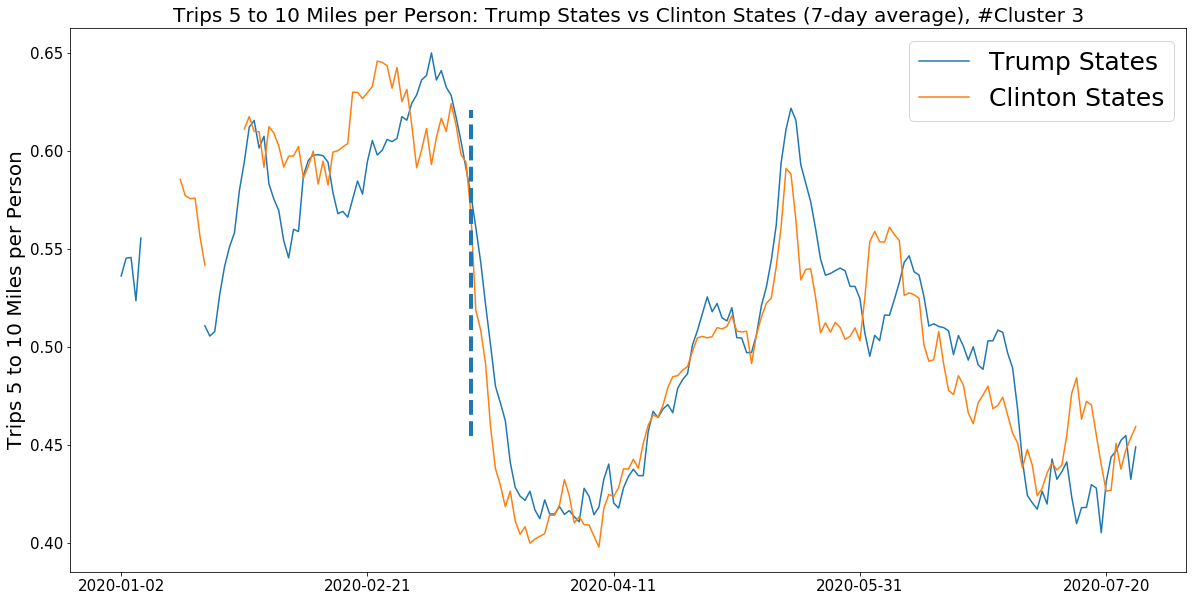

In [134]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_5_10', 'Total_Population', i, results_df, 7, 'Trips 5 to 10 Miles per Person')

# Trips 10 to 25 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


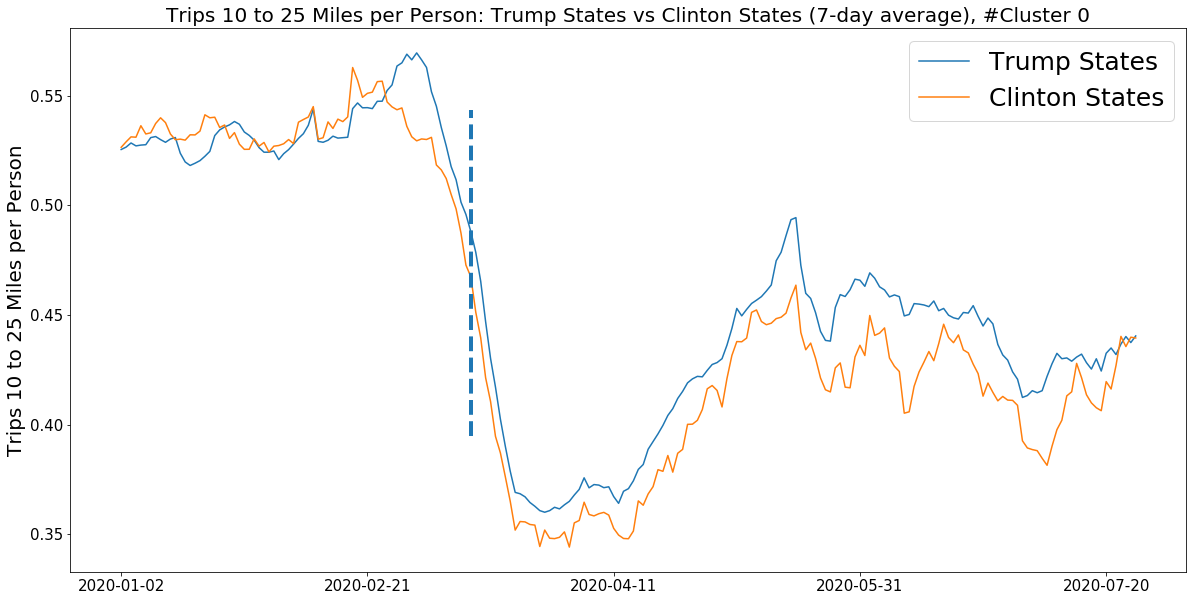

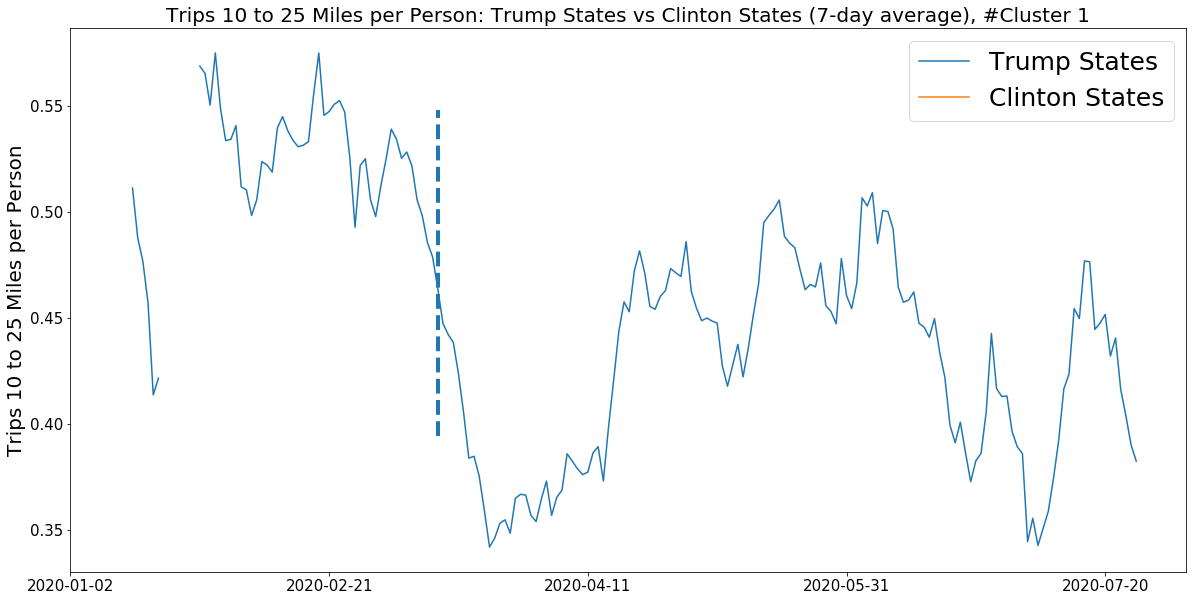

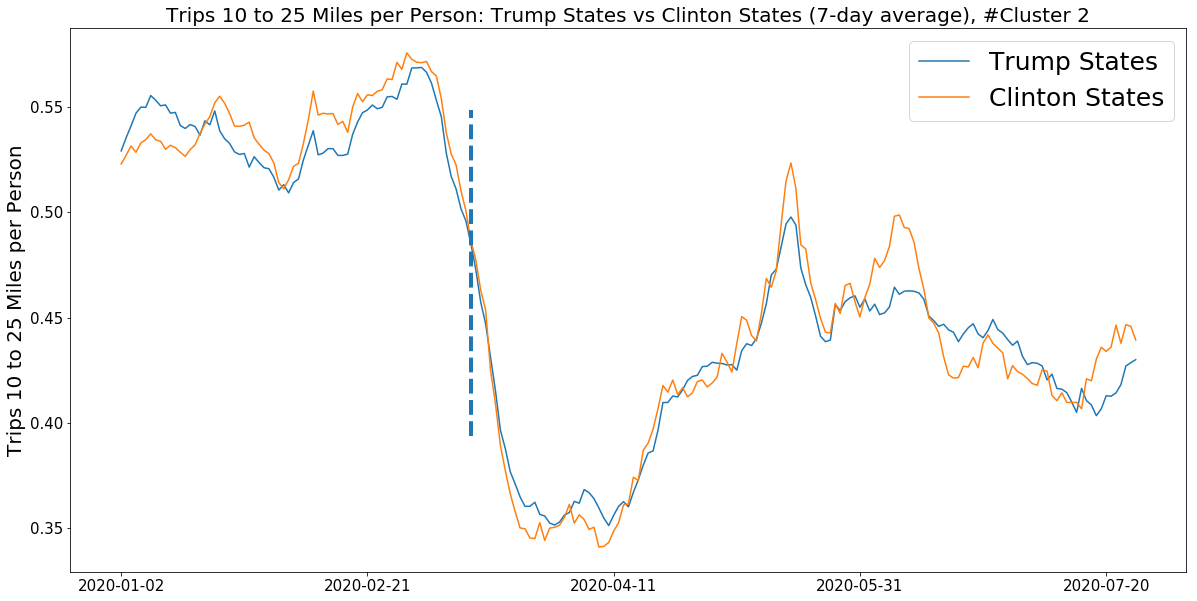

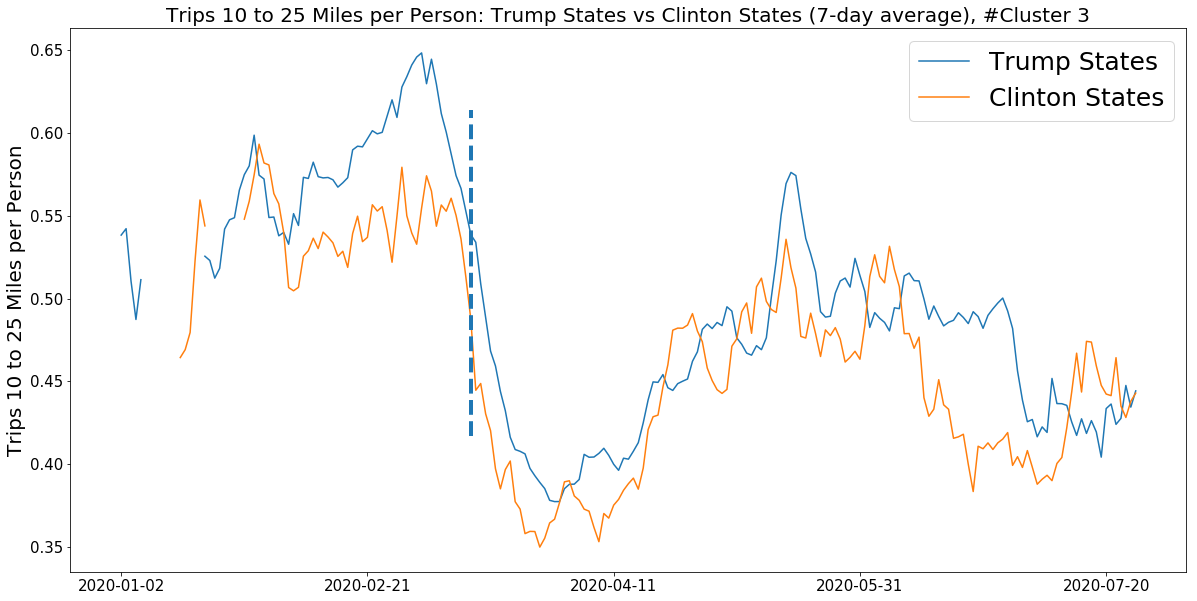

In [135]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_10_25', 'Total_Population', i, results_df, 7, 'Trips 10 to 25 Miles per Person')

# Trips 25 to 50 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


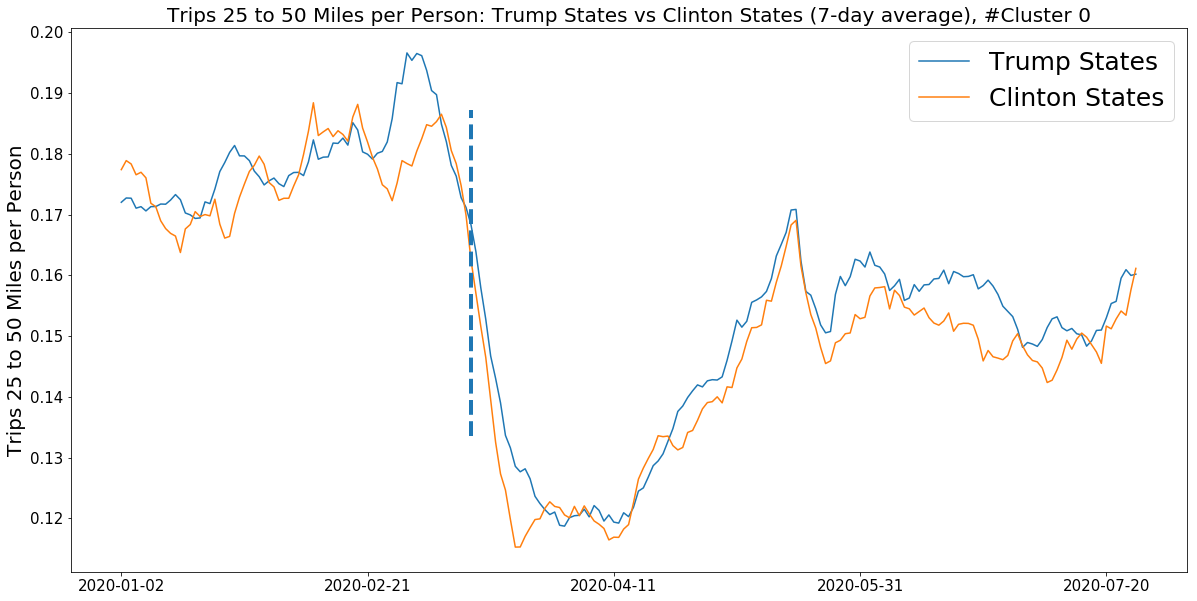

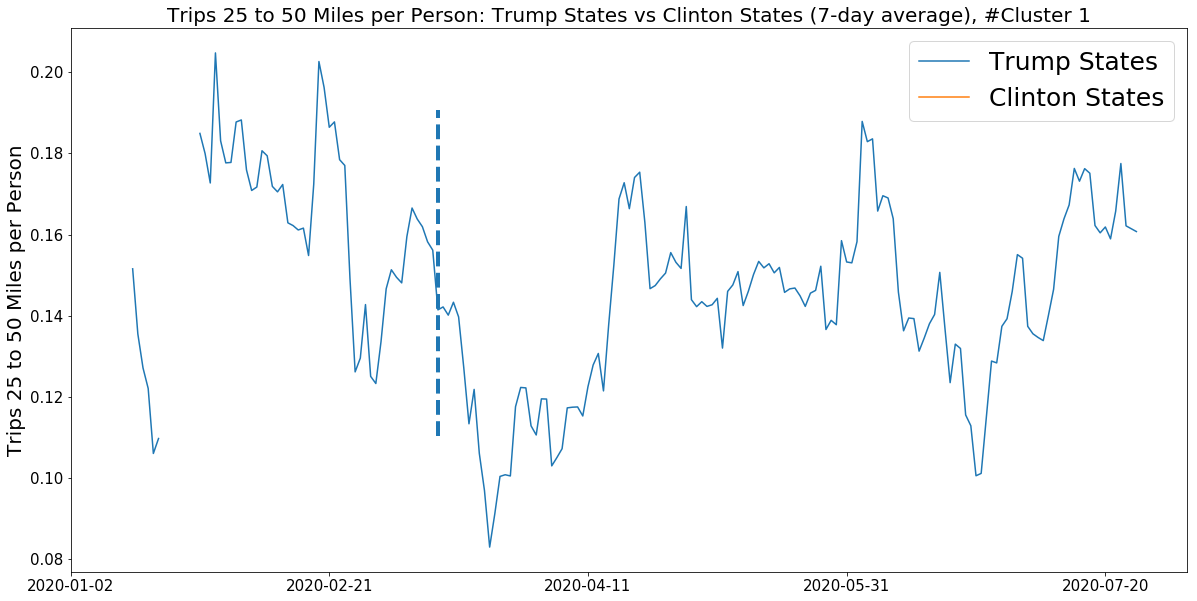

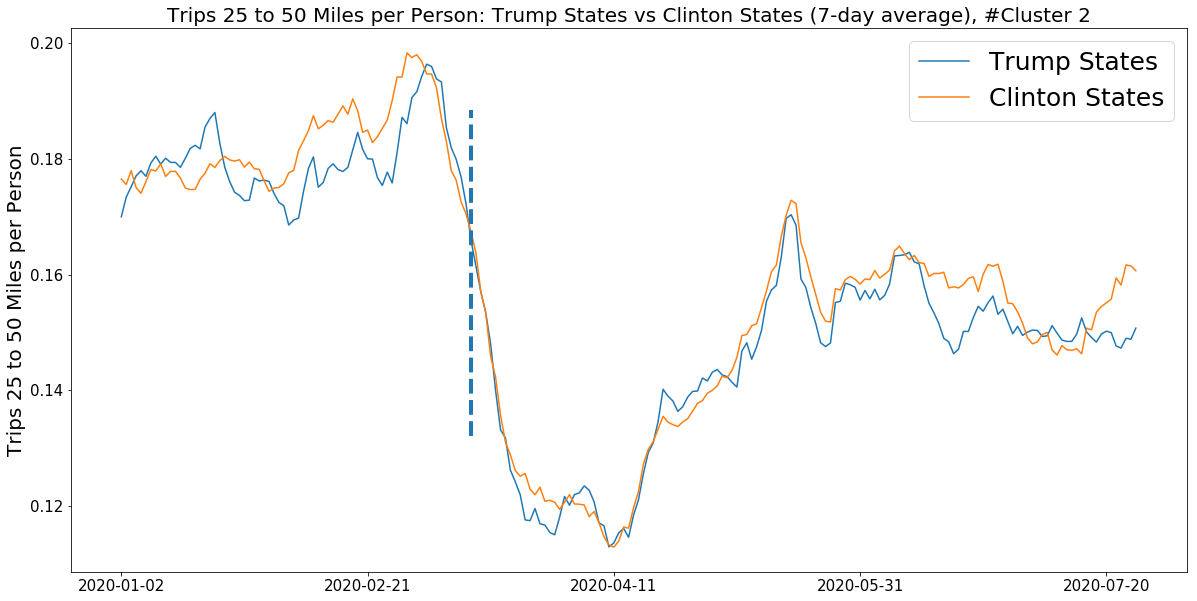

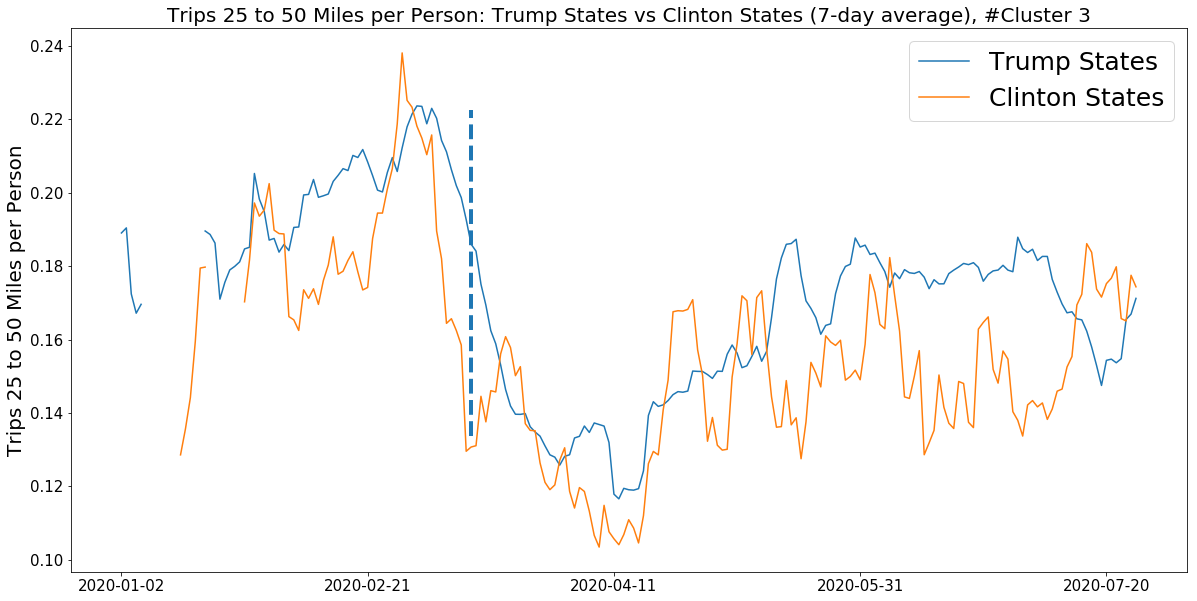

In [136]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_25_50', 'Total_Population', i, results_df, 7, 'Trips 25 to 50 Miles per Person')

# Trips 50 to 100 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


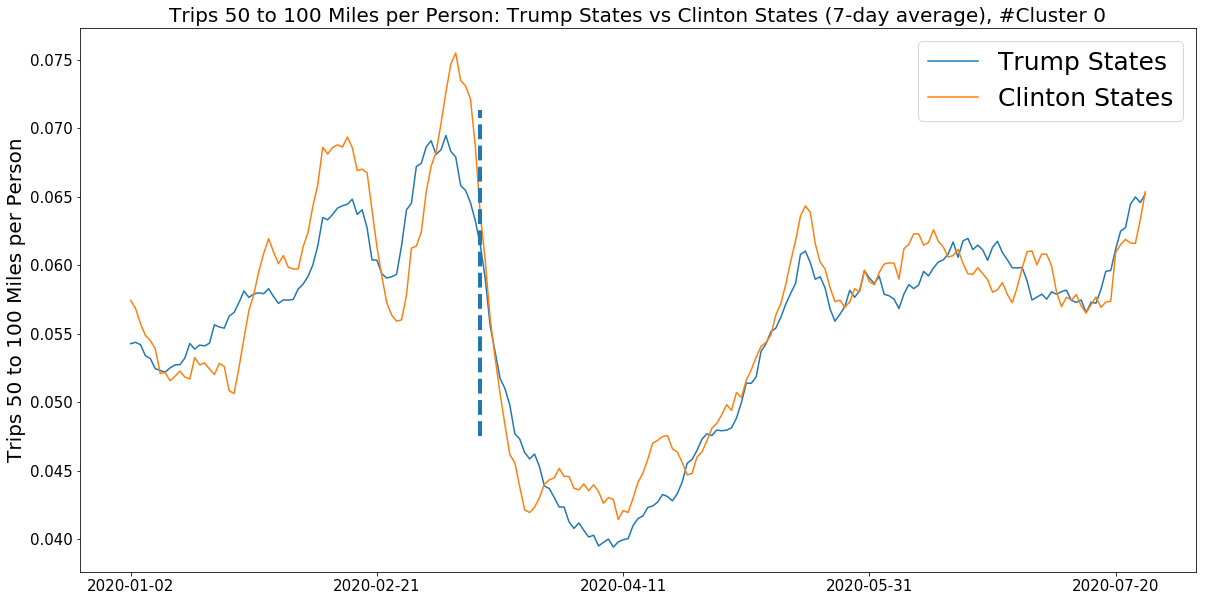

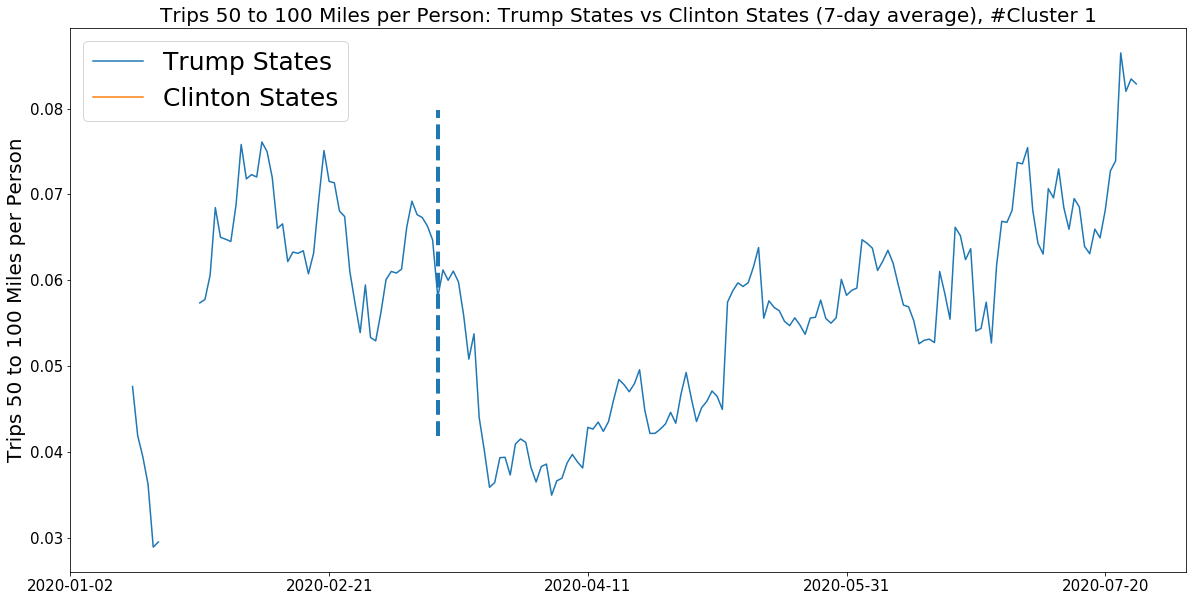

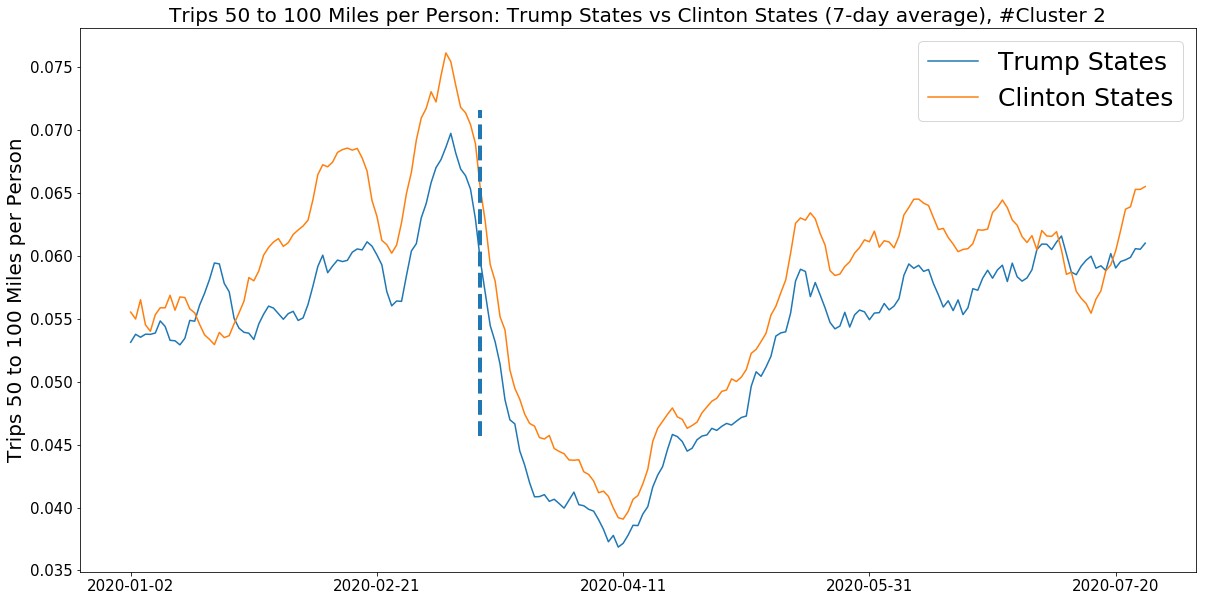

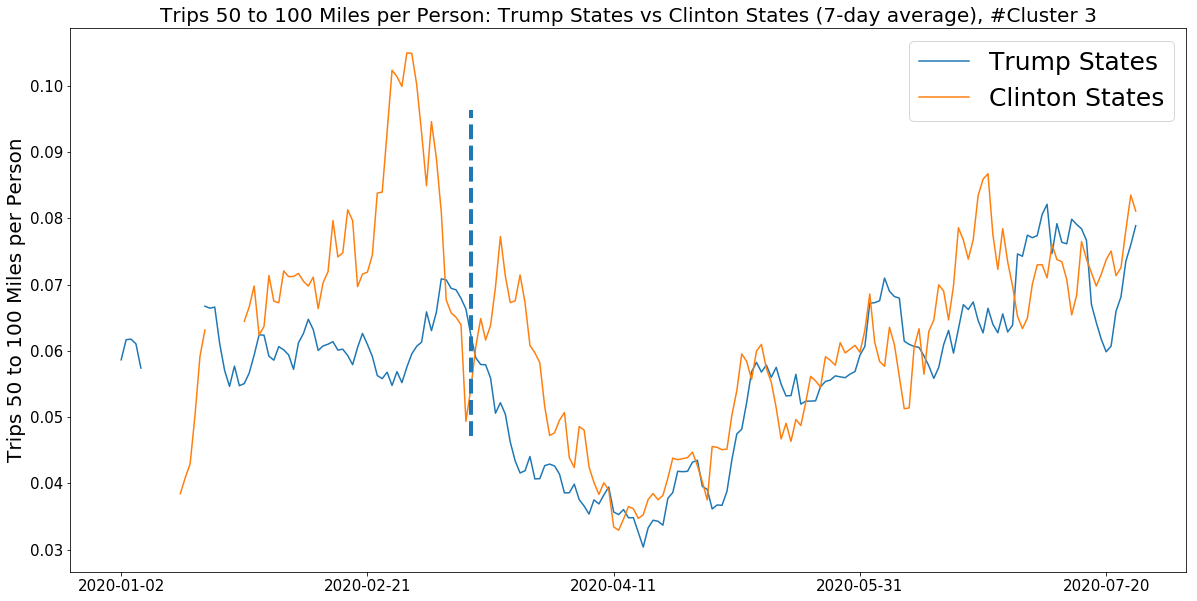

In [137]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_50_100', 'Total_Population', i, results_df, 7, 'Trips 50 to 100 Miles per Person')

# Trips 100 to 250 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


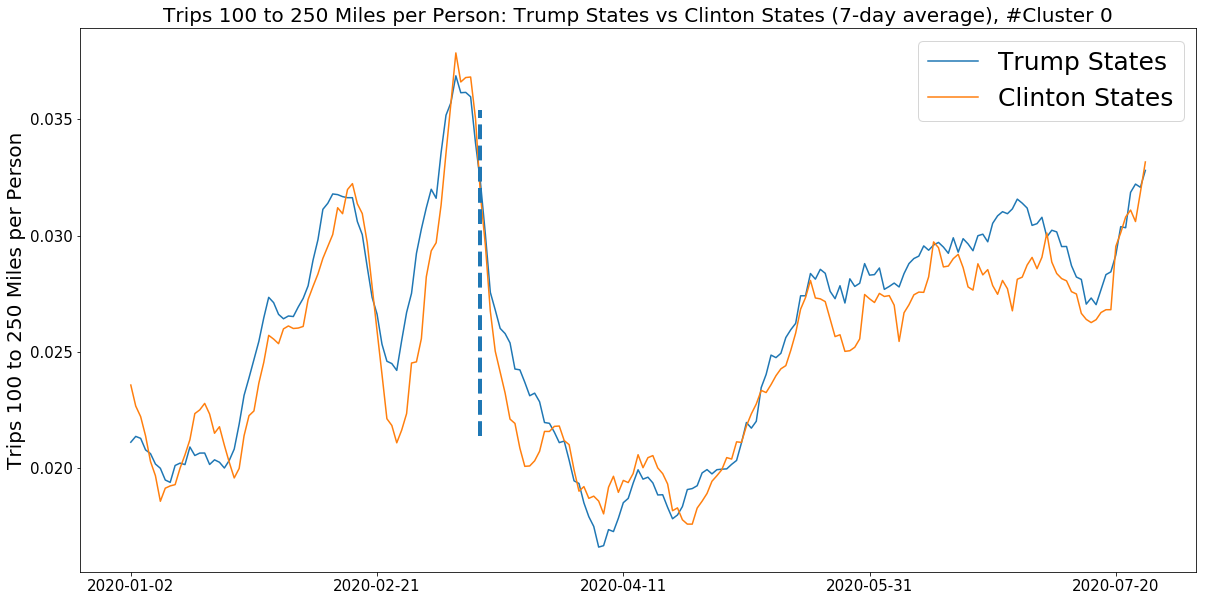

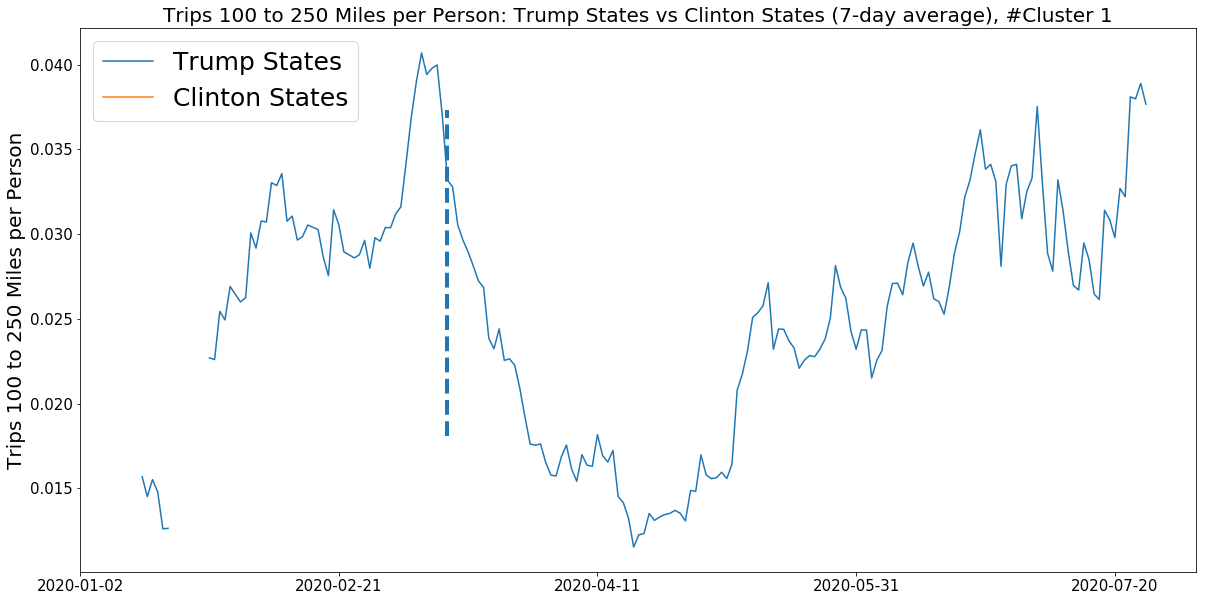

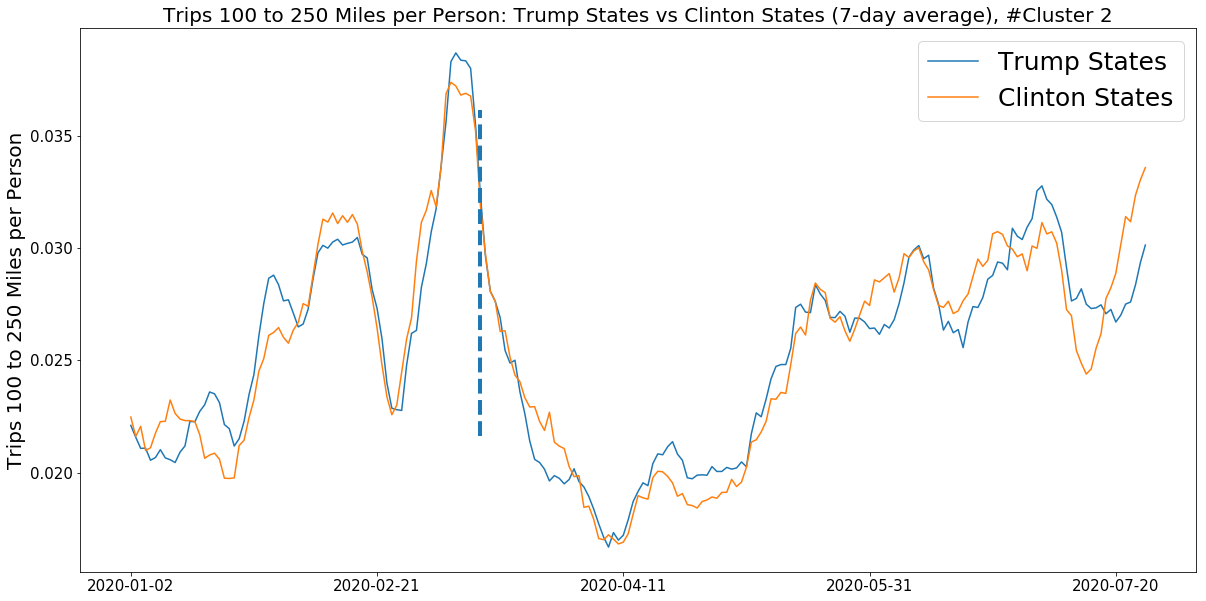

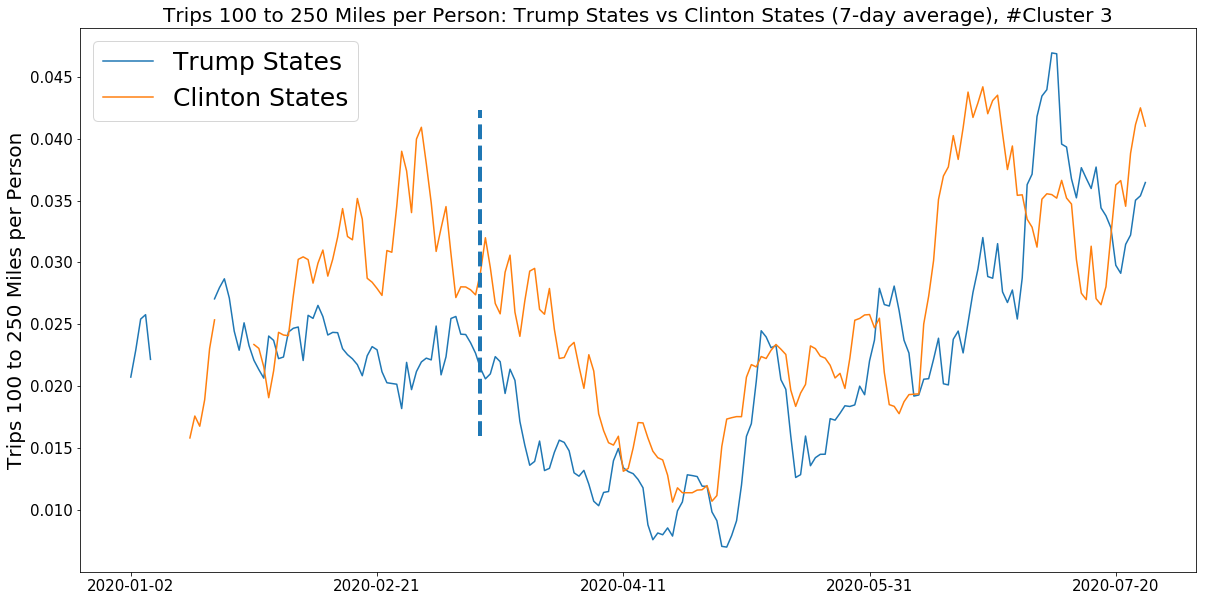

In [138]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_100_250', 'Total_Population', i, results_df, 7, 'Trips 100 to 250 Miles per Person')

# Trips 250 to 500 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


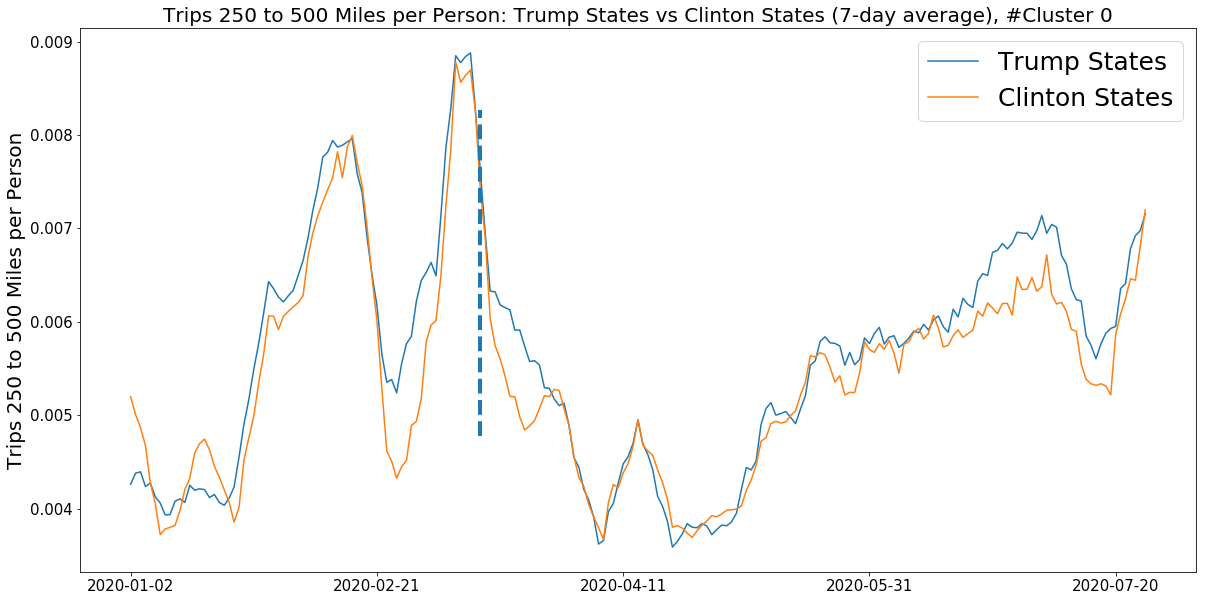

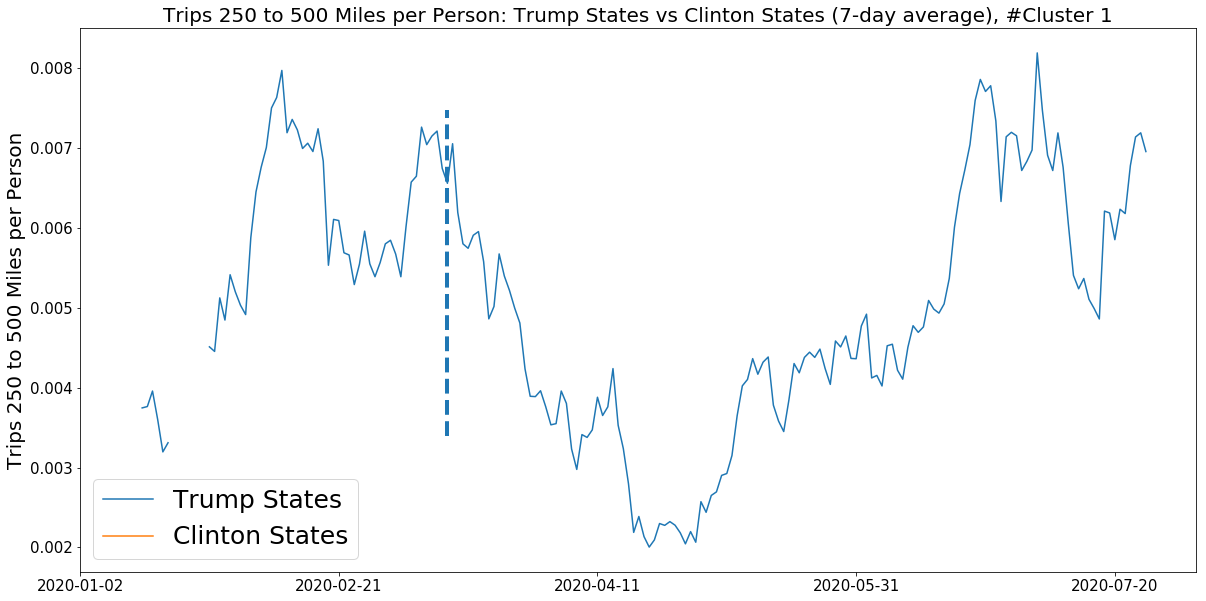

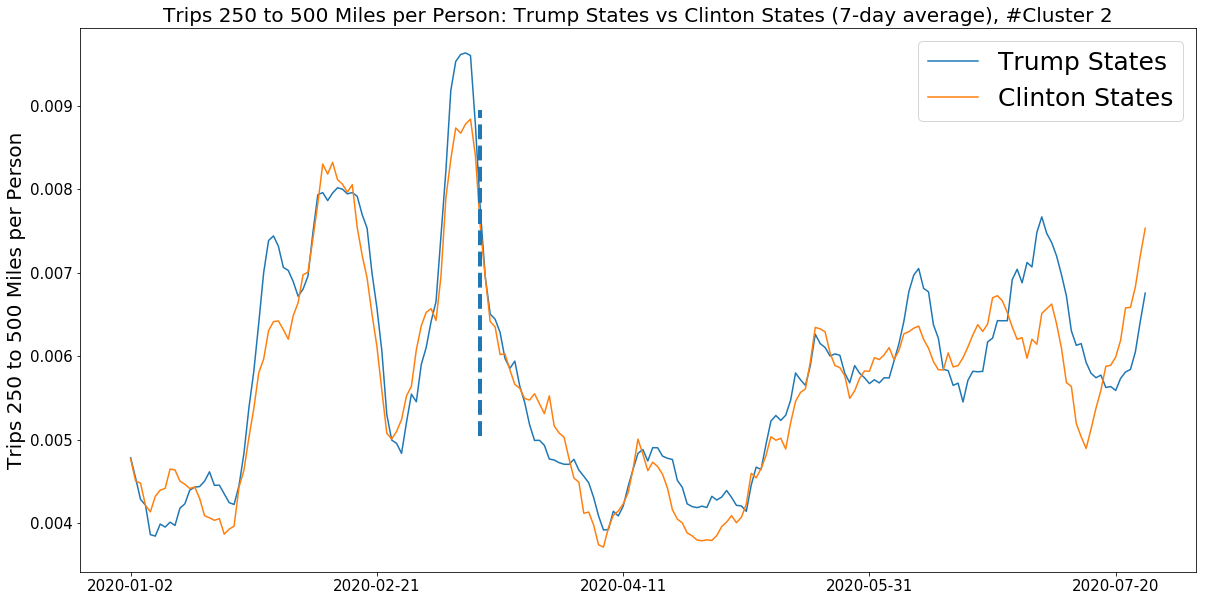

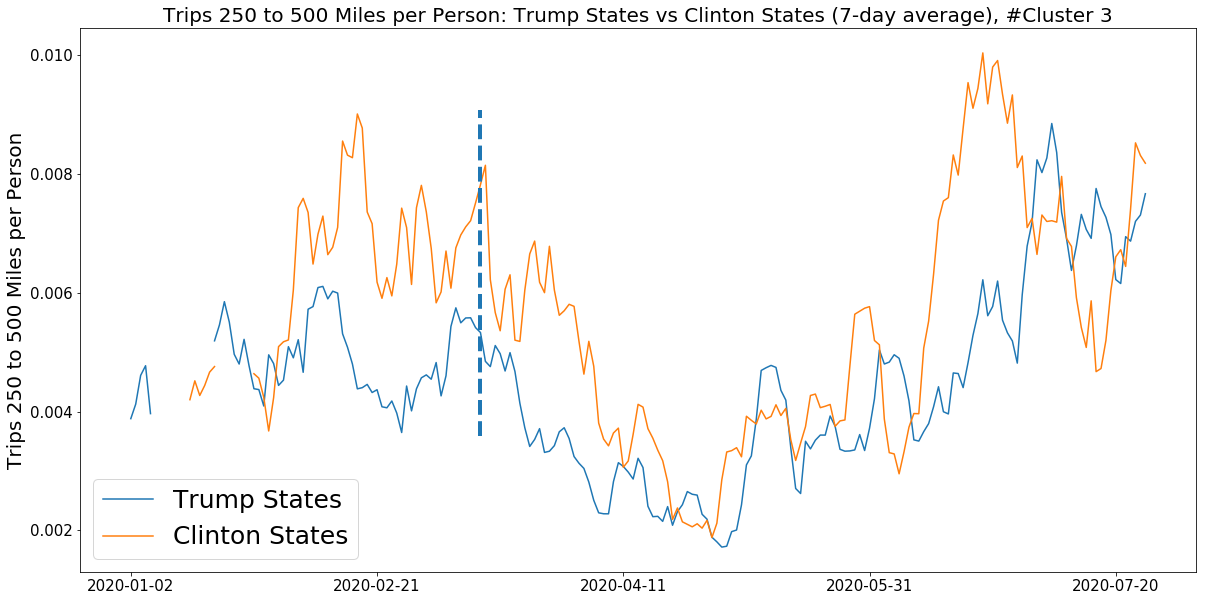

In [139]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_250_500', 'Total_Population', i, results_df, 7, 'Trips 250 to 500 Miles per Person')

# Trips More than 500 Miles per Person

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


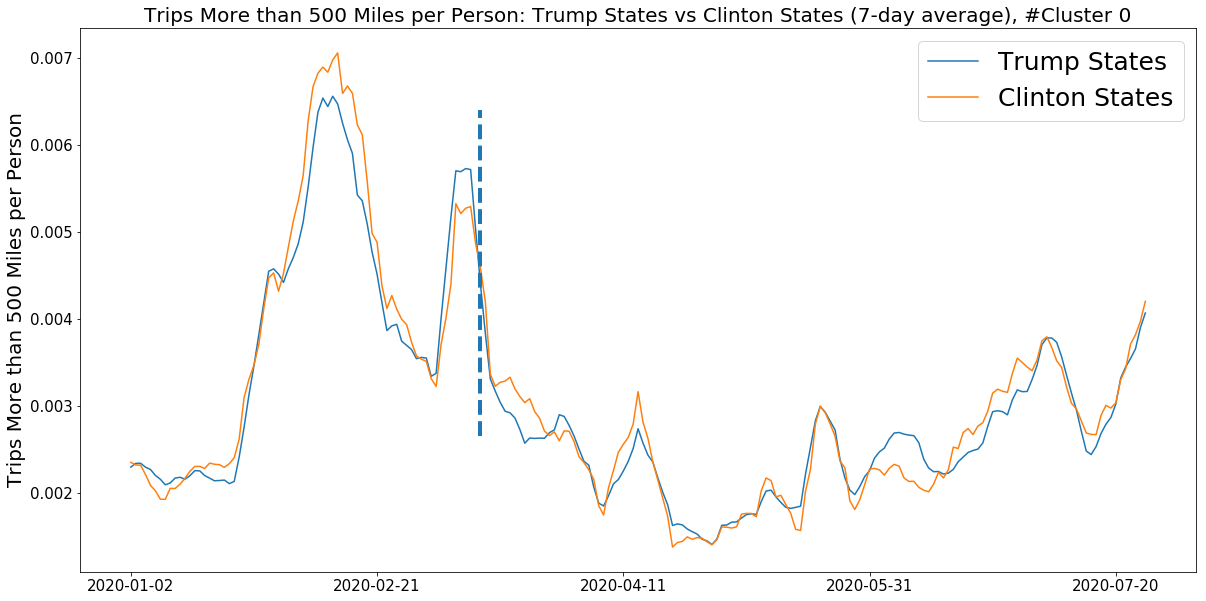

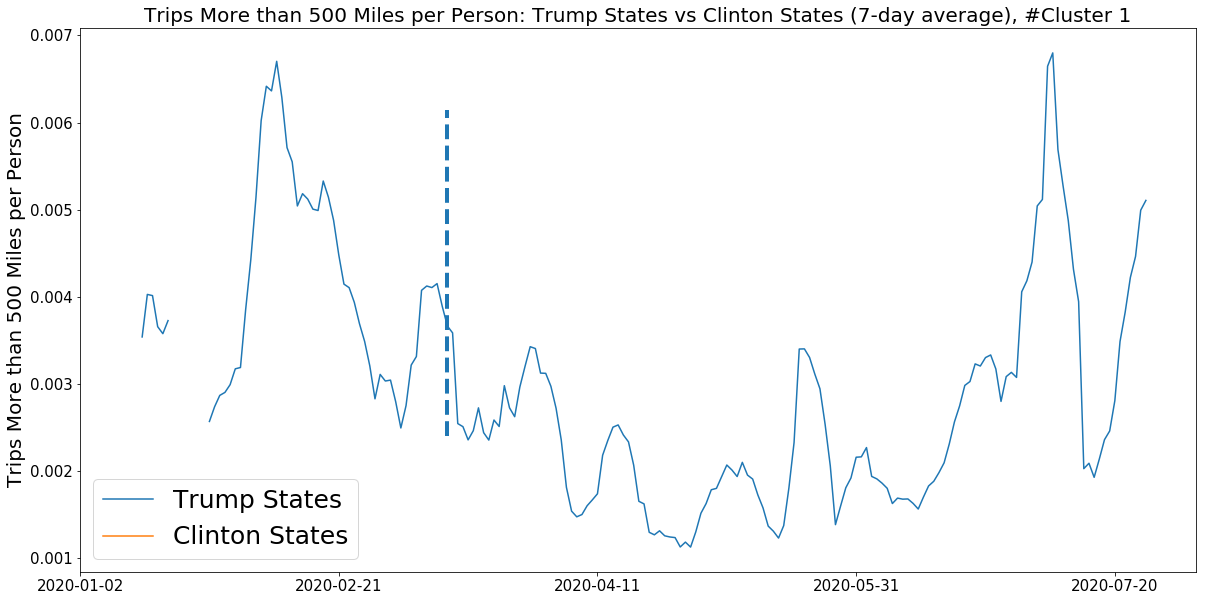

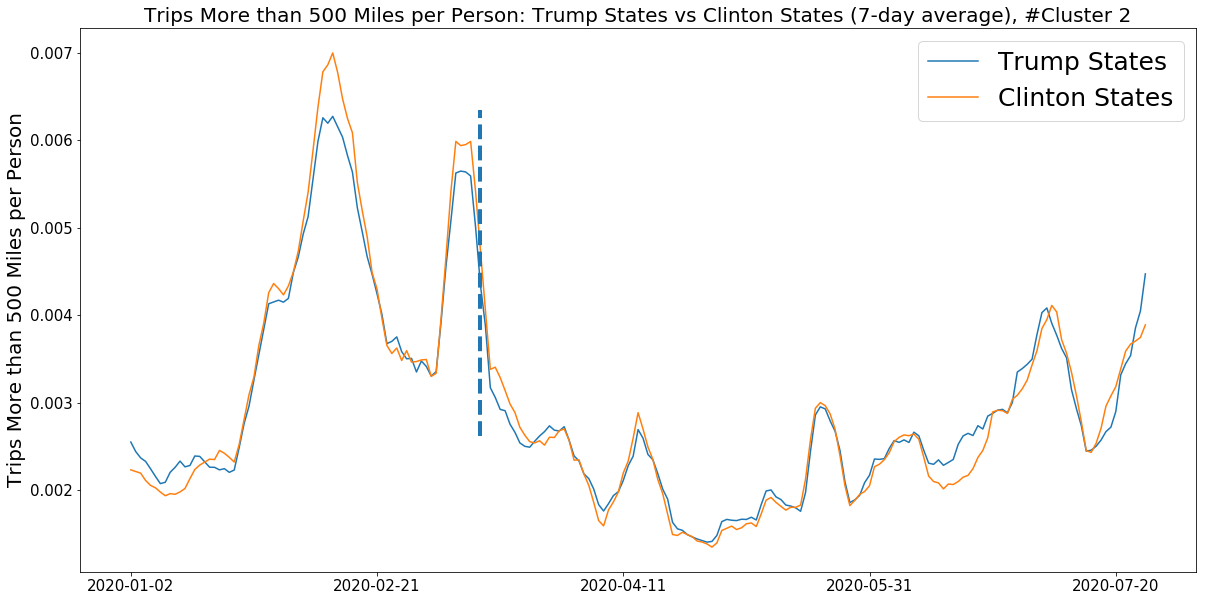

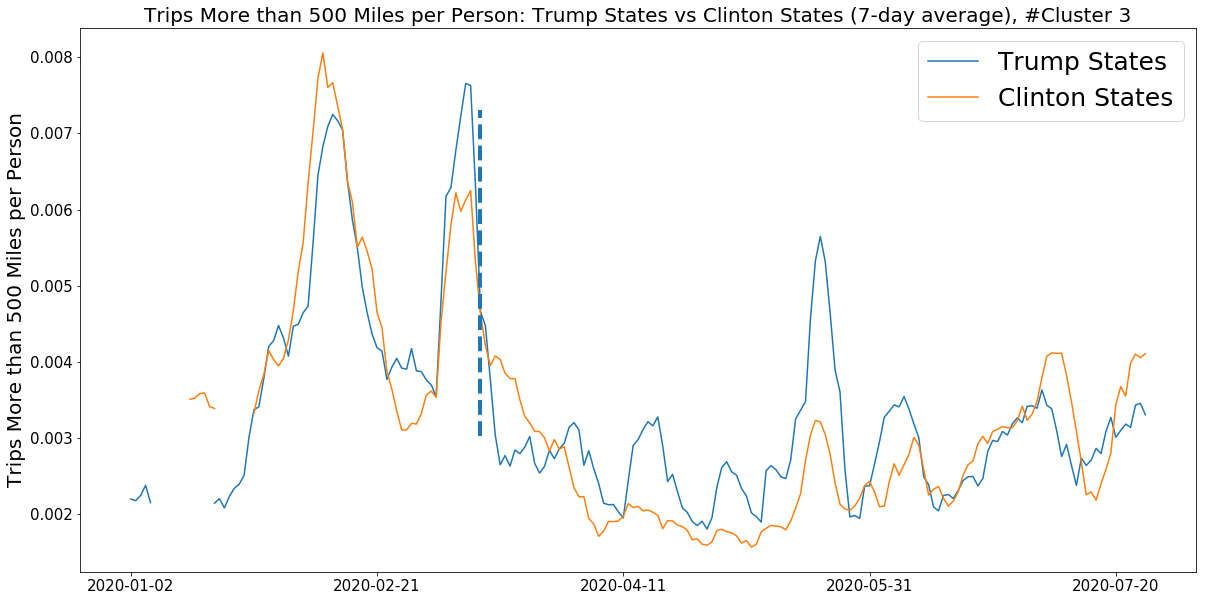

In [140]:
for i in range(4):
    plot_line(datetime.datetime(2020,1,2), period, 'trips_500', 'Total_Population', i, results_df, 7, 'Trips More than 500 Miles per Person')